
# Real-world data coding for neuroscientists (ReCoN)

### MSc in Translational Neuroscience,

### Department of Brain Sciences, Faculty of Medicine,

### Imperial College London

### Contributors: Cecilia Rodriguez, Katarzyna Zoltowska, Rishideep Chatterjee, Marirena Bafaloukou, Anastasia Ilina, Sahar Rahbar, Cynthia Sandor

### Autumn 2025

# 3. Time-series data as biological signals

### Introduction to Time-Series Data in Healthcare

---

Time-series datasets such as **electronic health records (EHRs)**, **clinical registries**, and **continuous physiological monitoring data** represent valuable (but imperfect) sources of information that can capture multiple aspects of a patient’s health over time. They may reflect genetic predispositions and lifestyle-related risks, signal the onset or progression of diseases, document new morbidities and comorbidities, record the timing and stage of diagnoses, and track the implementation and outcomes of treatment plans.

---

#### **Modeling Health Trajectories**

By leveraging data generated across these stages of care, we can build **machine learning models** that help us understand individual trajectories of health and disease. Such models can be used to:

- Identify disease states  
- Infer a patient’s current condition  
- Model transitions between states  
- Forecast likely future outcomes

<br>

---

#### **Example**: Wearable and Clinical Time-Series Data

Our lab, for example, has used **time-series data collected from free-living wearable devices** (such as accelerometers) to study and predict the progression of **Parkinson’s disease** and to estimate aspects of clinical trajectories.  

Other examples of time-series data commonly collected in healthcare include:

- EEG recordings  
- fMRI time-series  
- Heart rate or ECG waveforms  
- Continuous glucose monitoring data  
- Longitudinal EHR entries  

<br>

---

#### **Challenges in Modeling Time-Series Data**

Developing models for time-series data is **challenging**. These tasks intersect many areas of machine learning for healthcare, including:

- Survival analysis  
- Clustering and phenotyping  
- Screening and monitoring  
- Early diagnosis  
- Treatment-effect estimation  
- Dynamic forecasting  
<br>

---

#### **Static vs. Dynamic Models**

**Static (cross-sectional)** and **dynamic (temporal)** models differ fundamentally.  
The diversity of healthcare problems means there is **no single modeling approach** suitable for all time-series data.  

We therefore cannot treat *time* as just another data dimension.  
Moreover, time-series analysis introduces distinct challenges—such as ensuring that model outputs are **actionable, interpretable, and clinically reliable**—which justify treating it as a **research domain in its own right**.

<br>

---

#### **Complexities of Time-Series Data**

- **High dimensionality:** Many signals include multiple channels (e.g., EEG electrodes or multi-axis accelerometers) in addition to the time dimension.  
- **Noise and artifacts:** Motion, muscle activity, and sensor or equipment issues can introduce substantial artifacts.  
- **Irregular sampling:** Measurements are often taken at uneven time intervals, complicating analysis.  
- **Context dependence:** The same pattern can have different meanings depending on the patient’s clinical background or physiological state.  

<br>

---
<br>

> <br>
> ⚠️ <b>Warning</b>
> For this course, we will simplify these types of signals to extract meaningful features that will be useful for later exercises.  
> However, note that this is <b>only one of many ways</b>  to handle complex time-series data.  
> Simplification can lead to a <b> loss of clinical nuance</b> , <b>reduced sensitivity to individual variability</b> , <b>diminished accuracy</b>, or the <b>removal of important non-linear dynamics</b>
> <br>
> <br>





## 3.1 TASK 1. ECG Data

Great! Now, let’s build a complete feature-extraction pipeline for heartbeat (ECG) time series feature extraction. We will obtain the data from a public dataset (the MIT-BIH Arrhythmia Database from PhysioNet).

###  3.1.1.Data Acquisition

In [ ]:
# # NOTE: don't worry about this cell. 
# We just want to load the data from the physionet website to our directory, and then open it to store it in memory.

import wfdb
import os 
import numpy as np 
import matplotlib.pyplot as plt 

def download_ecg_data(record_id):
    record = wfdb.rdrecord(record_id, pn_dir='mitdb')

    signal_names = record.sig_name   # Signal names, e.g., ['MLII', 'V1']
    fs = record.fs                   # sampling frequency
    sig_len = record.sig_len         # Number of samples


    lead_idx = record.sig_name.index('MLII')
    sig = record.p_signal[:, lead_idx]

    return sig, fs

sig, fs = download_ecg_data('100')

In [2]:
# this is our original signal:
sig

array([-0.145, -0.145, -0.145, ..., -0.675, -0.765, -1.28 ])

In [3]:
# we can also print some preliminary information about the signal:
print(f'Number of samples: {len(sig)}')
print(f'Sampling frequency: {fs} Hz')
print(f'Duration of the entire signal: {len(sig) / fs} seconds   =   {len(sig) / fs / 60} minutes')


Number of samples: 650000
Sampling frequency: 360 Hz
Duration of the entire signal: 1805.5555555555557 seconds   =   30.092592592592595 minutes


In [13]:
print(f'Signal shape: {sig.shape}') 
print(f'Signal type: {sig.dtype}')

Signal shape: (650000,)
Signal type: float64


float64 indicates that each number of the signal is in floating-point format, a 64-bit data type (higher precision). There are also float32, float16, etc.

In [14]:
# This can be seen in the number of decimal places in the signal:
print(len(sig)/fs)

1805.5555555555557


In [15]:
# We can also reduce the precision to less decimal places by adding :.nf where n is the number of decimal places
print(f'{len(sig)/fs:.2f}')
print(f'{len(sig)/fs:.3f}')
print(f'{len(sig)/fs:.5f}')

1805.56
1805.556
1805.55556


In [16]:
# there are built in data analysis functions to help us get the basic statistics of a simple array, like min(), max(), mean(), std()
# We will be using these functions throughout the lecture, so make sure you read their documentation if you don't understand how they work.
print(f'Signal range: {sig.min()} to {sig.max()}')
print(f'Signal mean: {sig.mean():.2f}')
print(f'Signal standard deviation: {sig.std():.2f}')


Signal range: -2.715 to 1.435
Signal mean: -0.31
Signal standard deviation: 0.19


In [17]:
# You can also use the numpy functions to get the same informtion:
# https://numpy.org/doc/2.3/reference/generated/numpy.mean.html
# https://numpy.org/doc/2.3/reference/generated/numpy.min.html
# https://numpy.org/doc/2.3/reference/generated/numpy.max.html
# https://numpy.org/doc/2.3/reference/generated/numpy.std.html

print(f'Signal range: {np.min(sig)} to {np.max(sig)}')
print(f'Signal mean: {np.mean(sig):.2f}')
print(f'Signal standard deviation: {np.std(sig):.2f}')

Signal range: -2.715 to 1.435
Signal mean: -0.31
Signal standard deviation: 0.19


In [ ]:
# Don't worry about this funciton for now, it's just our helper function to introduce even more noise to the signal.
# You have already learned about why there is missingness in the data throughout the module.


def introduce_missingness(x, fs, p_nan=0.01, n_blocks=5, block_ms=(100, 300)):
    """
    Random single-point NaNs + several short dropout blocks.
    """
    x = np.copy(x)
    n = len(x)

    # single-point NaNs
    idx = np.random.choice(n, size=int(p_nan*n), replace=False)
    x[idx] = np.nan

    # dropout NaNs
    for _ in range(n_blocks):
        dur = np.random.randint(int(block_ms[0]*fs/1000), int(block_ms[1]*fs/1000))
        start = np.random.randint(0, max(1, n - dur))
        x[start:start+dur] = np.nan

    return x

# we want to introduce some missing values to the signal, so we can test our feature extraction methods later on.
sig_nan = introduce_missingness(sig, fs, p_nan=0.1) 

###  3.1.2. Data Checks

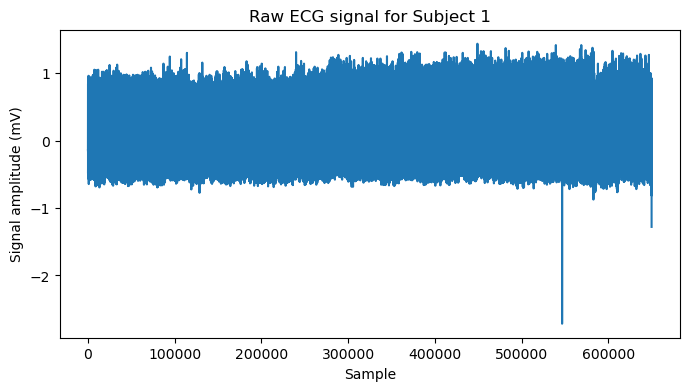

In [20]:
import matplotlib.pyplot as plt 

# This is our original signal
plt.figure(figsize=(8, 4))
plt.plot(sig)
plt.xlabel('Sample')
plt.ylabel('Signal amplitude (mV)')
plt.title('Raw ECG signal for Subject 1')
plt.show()

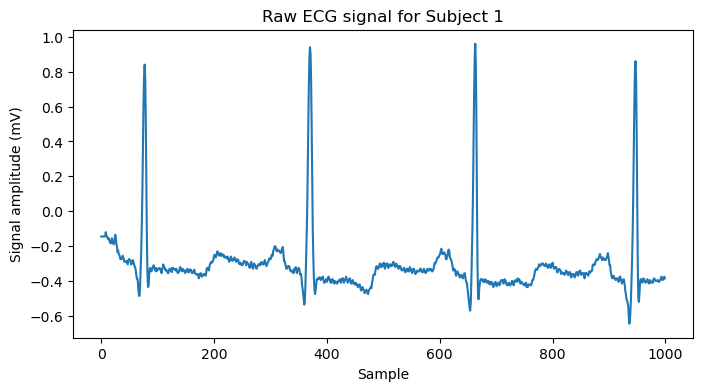

In [21]:
# It looks very messy, with a lot of noise, and doesn't contain the typical ECG patterns that we would expect.
# We can also see that the signal has some random large spikes (artifacts), isn't smooth, etc. 
# If we "zoom in" to the first 1000 samples, we can observe something we recognise:

# NOTE: this is one way to plot the signal. Matplotlib is a powerful library for creating plots in Python, as you have already learned. There are other libraries like seaborn and plotly that are also very useful. 
# You can find more information about matplotlib here: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html


plt.figure(figsize=(8, 4))
plt.plot(sig[0:1000])
plt.xlabel('Sample')
plt.ylabel('Signal amplitude (mV)')
plt.title('Raw ECG signal for Subject 1')
plt.show()

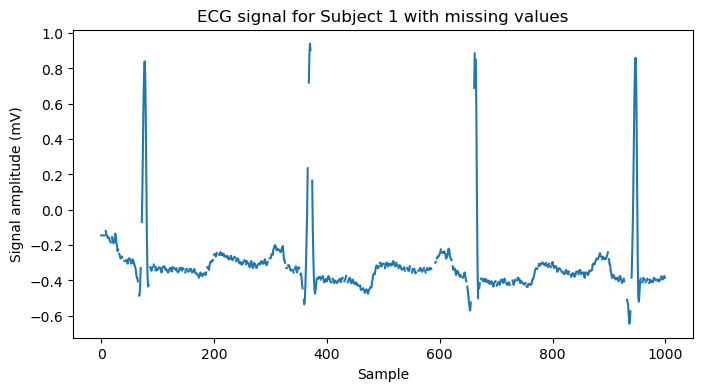

In [22]:
# Plotting the signal with missing values, we can observe some gaps in the signal:

plt.figure(figsize=(8, 4))
plt.plot(sig_nan[0:1000])
plt.xlabel('Sample')
plt.ylabel('Signal amplitude (mV)')
plt.title('ECG signal for Subject 1 with missing values')
plt.show()

In [23]:
# The signal with missing values is the same as the original signal, but we introduced some NaNs. If we wanted see some preliminary statistics of the signal, we would see that we would get an unexpected result.
# The same way as we have done before:

print(f'Signal range: {np.min(sig_nan)} to {np.max(sig_nan)}')
print(f'Signal mean: {np.mean(sig_nan):.2f}')
print(f'Signal standard deviation: {np.std(sig_nan):.2f}')

# This is because it has NaNs (obviously!)

Signal range: nan to nan
Signal mean: nan
Signal standard deviation: nan


In [24]:
print(f'Total number of NaNs: {np.sum(np.isnan(sig_nan))}')
print(f'Total percentage of NaNs: {100*np.sum(np.isnan(sig_nan))/len(sig_nan):.2f}%')

Total number of NaNs: 65313
Total percentage of NaNs: 10.05%


###  3.1.3. Preprocessing & Feature extraction

#### 2.1. Remove NaNs

<p> There are several ways to handle missing values in time-series data such as accelerometer recordings. For now, we’ll focus on a few simple and commonly used approaches: </p> 
<hr style="border:1px solid #BDC3C7;"> 

<h3 style="color:#34495E;">1. Dropping NaN Values</h3> 
<div style="background-color:transparent; border-left:5px solid #85929E; padding:10px; margin-bottom:15px;"> 
Remove all rows or samples containing missing values. This is useful for quick visualizations or exploratory checks, but it can <strong>shorten your time series</strong> and remove meaningful temporal information. 
</div> 

<h3 style="color:#34495E;">2. Mean / Median Imputation</h3> 
<div style="background-color:transparent; border-left:5px solid #5DADE2; padding:10px; margin-bottom:15px;"> 
Replace missing values with the <strong>mean</strong> or <strong>median</strong> of the observed data. <br> 
This approach is simple and often works for a quick inspection, but it can <strong>flatten variability</strong> and <strong>distort the temporal dynamics</strong> of the original signal. 
</div> 

<h3 style="color:#34495E;">3. Forward Fill (Last Observation Carried Forward)</h3> 
<div style="background-color:transparent; border-left:5px solid #48C9B0; padding:10px; margin-bottom:15px;"> 
Replace each missing entry with the <strong>most recent valid observation</strong>. <br> 
This method preserves continuity and the general shape of the signal, but extended gaps can create <strong>flat or frozen segments</strong> where the signal stops reflecting real changes. 
</div> 

<h3 style="color:#34495E;">4. Rolling Average (Moving Window Imputation)</h3> 
<div style="background-color:transparent; border-left:5px solid #F4D03F; padding:10px; margin-bottom:15px;"> 
Estimate missing values using the <strong>average of nearby points</strong> within a defined time window. <br> 
This leverages the <em>local temporal structure</em> of the data and works best when neighboring samples are <strong>temporally correlated</strong> (as is common in accelerometer, neural, or physiological signals). 
</div> 

<hr style="border:1px solid #BDC3C7;"> 
<p> These imputation methods are foundational techniques for cleaning and preprocessing time-series data. Each makes different assumptions about how your signal evolves over time, and the best choice depends on your data characteristics and research goals. </p>


---

<p> More advanced imputation techniques, such as <strong>Random Imputer</strong> or <strong>KNN Imputer</strong>, amongst others, make different assumptions about the data. A <strong>Random Imputer</strong> replaces missing values with random samples drawn from the observed distribution, which helps preserve overall variability but ignores the temporal order of the signal. In contrast, a <strong>K-Nearest Neighbors (KNN) Imputer</strong> estimates each missing value based on the most similar samples (or “neighbors”) in the dataset, capturing relationships between variables or channels. 

While these methods can be more data-driven, they are typically less suited for <em>temporally continuous signals</em> like accelerometer data unless temporal context is explicitly modeled. </p>

If you want to learn more about them, you can check the documentation: https://scikit-learn.org/stable/modules/impute.html

---

In [25]:
# Method 1: Dropping NaN values
# 1. Identify the locations of the NaNs (not the NaNS themselves)
nan_idx = np.where(np.isnan(sig_nan))
print(f'NaN locations: {nan_idx}')

print('\n') # This adds a new line in the output

# 2. Drop the NaNs
sig_clean = sig_nan[~np.isnan(sig_nan)]
print(f'Clean signal: {sig_clean}')
print(f'Length of clean signal: {len(sig_clean)}')
print(f'Length of original signal: {len(sig_nan)}')

NaN locations: (array([     7,     18,     31, ..., 649984, 649994, 649996]),)


Clean signal: [-0.145 -0.145 -0.145 ... -0.675 -0.765 -1.28 ]
Length of clean signal: 584687
Length of original signal: 650000


The expression ```python sig_nan[~np.isnan(sig_nan)] ``` can look a bit tricky at first glance.
<br>
<br>
<br>
  
Here’s what’s happening step by step:


1. ```python np.isnan(sig_nan) ``` returns a boolean array of the same shape as sig_nan, where each element is <span style="color:blue"><b>True</b></span> if it’s a NaN and <span style="color:red"><b>False</b></span> otherwise.



2. The ~ operator is the logical NOT in NumPy, 
<p style="margin-left: 60px">
<code>~np.isnan(sig_nan)</code> inverts the boolean array.  
<span style="color:blue"><b>True</b></span> becomes <span style="color:red"><b>False</b></span>, and  
<span style="color:blue"><b>False</b></span> becomes <span style="color:red"><b>True</b></span>.
</p>


3. Finally, ```python sig_nan[~np.isnan(sig_nan)]``` uses boolean indexing to select only those elements in sig_nan that are not NaN.
<p style="margin-left: 60px">
It is a boolean indexing, where <b>~</b> is the not operator. So, it is saying <b>"keep all the values in sig_nan where the value is not a NaN"</b>.
</p>




In [26]:

# Equally, you can use the command sig_nan[np.isnan(sig_nan)] to get the NaNs themselves:
nan_sig = sig_nan[np.isnan(sig_nan)]
print(f'NaN signal: {nan_sig}')


NaN signal: [nan nan nan ... nan nan nan]


In [17]:
# Method 2: Mean / median imputation
def impute_mean(signal):
    mean_val = np.nanmean(signal)
    return np.where(np.isnan(signal), mean_val, signal)

mean_imputation = impute_mean(sig_nan)
print(f'Clean signal: {mean_imputation}')

def impute_median(signal):
    median_val = np.nanmedian(signal)
    return np.where(np.isnan(signal), median_val, signal)

median_imputation = impute_mean(sig_nan)
print(f'Clean signal: {median_imputation}')

Clean signal: [-0.145      -0.145      -0.145      ... -0.30634642 -0.765
 -1.28      ]
Clean signal: [-0.145      -0.145      -0.145      ... -0.30634642 -0.765
 -1.28      ]


In [18]:
# Method 3: Forward fill

def impute_forward(signal):
    filled = signal.copy()
    for i in range(1, len(filled)):
        if np.isnan(filled[i]):
            filled[i] = filled[i - 1]
    return filled


fill_imputation = impute_forward(sig_nan)
print(f'Clean signal: {fill_imputation}')

Clean signal: [-0.145 -0.145 -0.145 ... -0.445 -0.765 -1.28 ]


In [19]:
# Method 4: Rolling avearage
def impute_rolling(signal, window=3):
    """Replace NaNs with local rolling average."""
    filled = signal.copy()
    for i in range(len(signal)):
        if np.isnan(signal[i]):
            left = max(0, i - window)
            right = min(len(signal), i + window + 1)
            local_vals = signal[left:right]
            filled[i] = np.nanmean(local_vals)
    return filled

rolling_imputation = impute_rolling(sig_nan)
print(f'Clean signal: {rolling_imputation}')

/rds/general/user/cr620/ephemeral/ipykernel_3895231/380658829.py:10: RuntimeWarning: Mean of empty slice
  filled[i] = np.nanmean(local_vals)


Clean signal: [-0.145 -0.145 -0.145 ... -0.438 -0.765 -1.28 ]


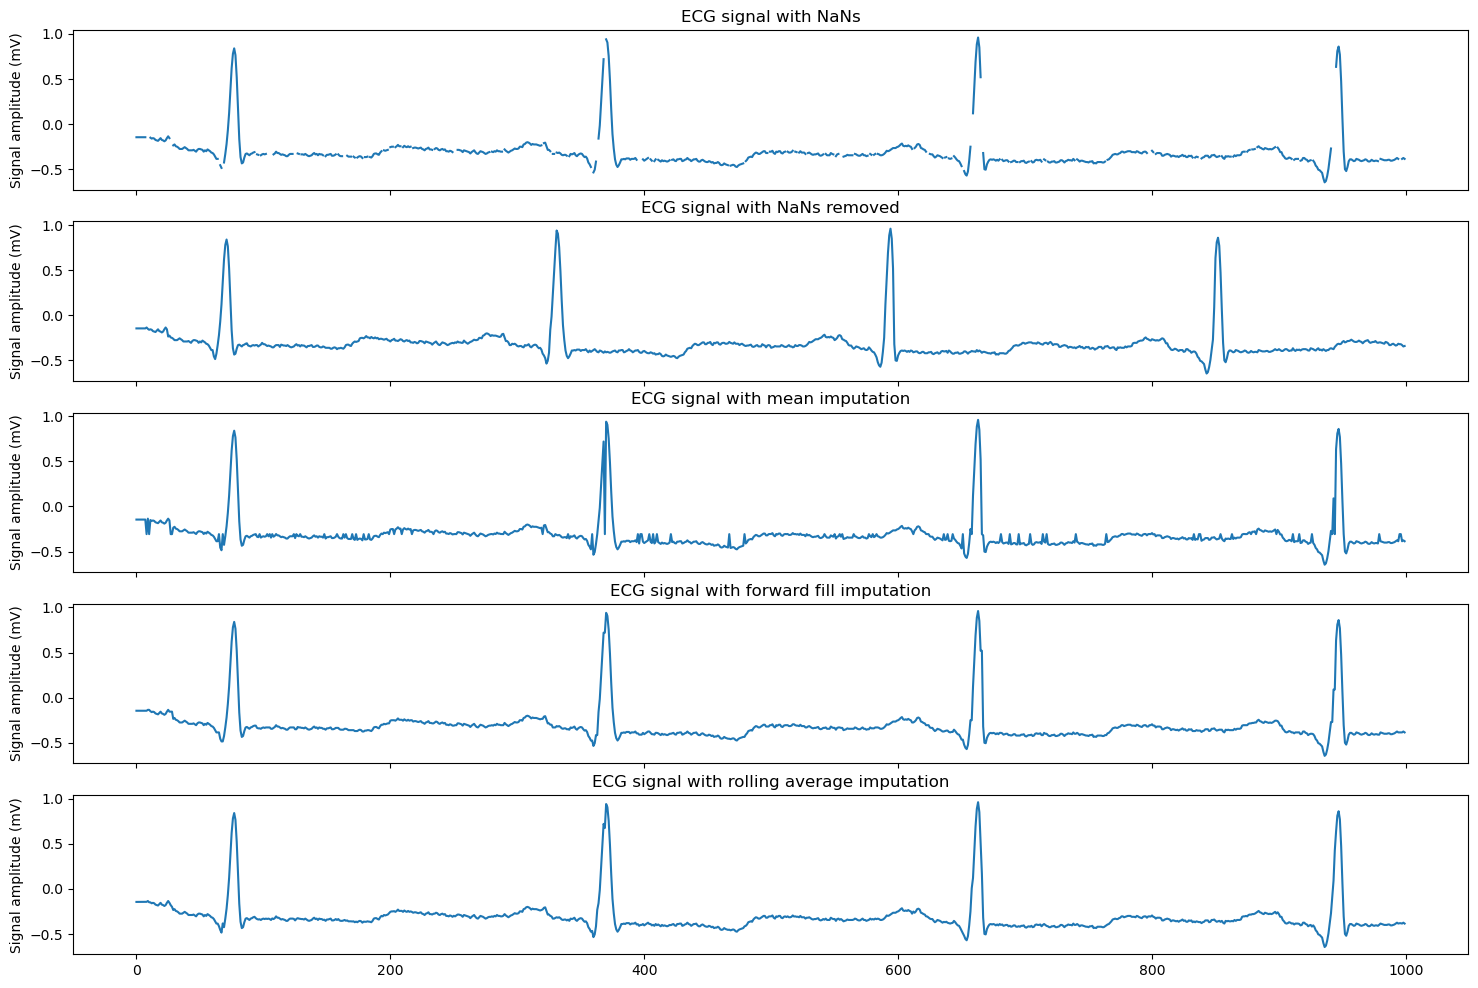

In [20]:
# Plotting the signal with missing values, we can observe some gaps in the signal:

fig, ax = plt.subplots(5, 1,figsize=(18, 12))
ax[0].plot(sig_nan[0:1000])
ax[0].set_ylabel('Signal amplitude (mV)')
ax[0].set_xticklabels([])
ax[0].set_title('ECG signal with NaNs')

ax[1].plot(sig_clean[0:1000])
ax[1].set_ylabel('Signal amplitude (mV)')
ax[1].set_xticklabels([])
ax[1].set_title('ECG signal with NaNs removed')

ax[2].plot(mean_imputation[0:1000])
ax[2].set_ylabel('Signal amplitude (mV)')
ax[2].set_xticklabels([])
ax[2].set_title('ECG signal with mean imputation')

ax[3].plot(fill_imputation[0:1000])
ax[3].set_ylabel('Signal amplitude (mV)')
ax[3].set_xticklabels([])
ax[3].set_title('ECG signal with forward fill imputation')

ax[4].plot(rolling_imputation[0:1000])
ax[4].set_ylabel('Signal amplitude (mV)')
ax[4].set_title('ECG signal with rolling average imputation')
plt.show()

##### What do you observe?

- Are there any **temporal differences** between the signals?
- Why do you observe **peaks** in the *mean imputation*? What could be causing this?
- Why does the **last peak** of the *forward fill* imputation method show a **dent** in the signal?
- Do you observe **any other notable features** or patterns?

<br><br>


#### 2.2. Cleaning the signal

<p> Physiological signals like ECG or accelerometer data often contain random noise. These are small, fast fluctuations that can arise from electrical interference, sensor movement, or biological sources such as muscle activity. Smoothing helps reveal the underlying physiological patterns (e.g., heartbeats, movement cycles, etc.). <br> There are multiple ways to process a signal to reduce unwanted noise or isolate specific frequency components — you will learn more about these throughout the Master’s program. For now, we will focus on a few simple approaches: </p> 
<hr style="border:1px solid #BDC3C7;"> 

<h3 style="color:#34495E;">1. Smoothing / Denoising (Moving Average Filter)</h3> 
<div style="background-color:transparent; border-left:5px solid #85929E; padding:10px; margin-bottom:15px;"> 
The moving average filter smooths rapid changes by replacing each data point with the average of its neighboring values.

This is done by calculating local mean values over a sliding window of length <i>M</i> across the signal <i>x</i>.

$$
y[i] = \frac{1}{M} \sum_{k=-\frac{M-1}{2}}^{\frac{M-1}{2}} x[n + k]
$$

In other words:

- Take a small “window” (M samples wide),
- Slide it across the signal,
- Replace each point with the average value within that window.
</div> 

<h3 style="color:#34495E;">2. Normalisation / Scaling</h3> 
<div style="background-color:transparent; border-left:5px solid #5DADE2; padding:10px; margin-bottom:15px;"> 
Different sensors (or even the same sensor in different sessions) can record signals with different amplitude ranges. For example, one ECG might range between −2 and +2 mV, while another between −0.5 and +0.5 mV. <br> 
Normalization rescales the signal so that: - The mean is 0 (centered around zero), - The standard deviation is 1.

$$
y[i] = \frac{{x_i} - mean(x)}{std(x)} 
$$
</div> 

<h3 style="color:#34495E;">3. Filtering (Band-pass Filter)</h3> 
<div style="background-color:transparent; border-left:5px solid #48C9B0; padding:10px; margin-bottom:15px;"> 
A band-pass filter allows only a specific frequency range to pass through while attenuating frequencies outside that range. <br> 
For example, in ECG analysis, we often keep components between roughly 0.5 Hz and 40 Hz (to capture heartbeats) while removing very slow drifts (< 0.5 Hz) and high-frequency noise (> 40 Hz).

Filters use mathematical operations such as convolution to modify the signal’s frequency content.

There are several types of filters that can be used for bandpassing, each designed for a specific purpose. In this case, we’ll use a **zero-phase delay Butterworth filter**, known for having an exceptionally flat frequency response within the passband and no phase distortion. This ensures that the filtered signal remains as true as possible to the original, minimizing any time-related distortion introduced by filtering.

Filtering operates through **transfer functions**, which describe how the amplitude of an output signal changes as a function of the input signal’s frequency. The transfer function of an electronic filter can be represented by its **zeros**, **poles**, and **gain**.

- **Zeros** are frequencies that cause the numerator of the transfer function to equal zero. They increase the slope of the system’s transfer function.  
- **Poles** are frequencies that cause the denominator of the transfer function to equal zero. They decrease the slope of the magnitude response.  
- **Gain** represents the frequency response of the filter. A gain of `0` means complete attenuation (the frequency is fully removed), while a gain of `1` means the frequency is fully retained.

The transfer function also includes a **polynomial**, which defines the specific characteristics of the filter. For a Butterworth filter, this is the **Butterworth polynomial**, whose **order** determines the steepness of the roll-off.  
A first-order Butterworth filter has a gentle roll-off, meaning the transition between suppressed and desired frequencies is wide. In other words, the passband (the range of frequencies we want to keep) needs to be relatively large, and the signal should be sufficiently far from the cut-off frequencies for optimal performance. To achieve a sharper transition, we can either increase the frequency range or use a **higher-order filter**. In practice, a **4th-order Butterworth filter** is commonly used.

---

**Butterworth Filter**

The general transfer function of an *n*-th order Butterworth filter is:

$$
H(s) = \frac{1}{\sqrt{1 + \left( \frac{s}{\omega_c} \right)^{2n}}}
$$

where:  
- $H(s)$ — filter transfer function  
- $s$— complex frequency variable  
- $\omega_c$ — cutoff (corner) angular frequency  
- $n$ — order of the filter  

---

**Bandpass Butterworth Filter**

A bandpass Butterworth filter can be formed by combining a high-pass and a low-pass Butterworth filter:

$$
H(s) = \frac{s^n}{(s^2 + \sqrt{2}s + 1)^n}
$$

or more generally:

$$
H(s) = \frac{(s / \omega_L)^n}{\sqrt{ \left[1 + (s / \omega_L)^{2n}\right] \left[1 + (\omega_H / s)^{2n}\right] }}
$$

where:  
- $\omega_L$ — lower cutoff frequency (rad/s)  
- $\omega_H$ — upper cutoff frequency (rad/s)  

---

**Discrete Form**

For digital implementation (after applying a bilinear transform), the filter is expressed as:

$$
H(z) = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2} + \dots + b_n z^{-n}}{1 + a_1 z^{-1} + a_2 z^{-2} + \dots + a_n z^{-n}}
$$

where the coefficients $a_i$ and $b_i$ are determined from the desired cutoff frequencies and filter order.

![](images/filter.png)

**Here you can see the gain of the filter with different orders**
</div> 

<h3 style="color:#34495E;">4. Resampling / Downsampling</h3> 
<div style="background-color:transparent; border-left:5px solid #F4D03F; padding:10px; margin-bottom:15px;"> 
Resampling changes the number of samples in your signal — either increasing (upsampling) or decreasing (downsampling) the sampling rate. This is useful when comparing signals recorded at different rates (e.g., ECG at 500 Hz vs. accelerometer data at 100 Hz) or when reducing data size for analysis. <br> 
</div> 
<hr style="border:1px solid #BDC3C7;">


In [22]:
# Method 1: Smoothing using a moving average window.
def MAW(signal, k):
    # pad the signal with with 0s to avoid edge effect:
    half_window = k//2
    padded_signal = np.concatenate((np.zeros(half_window), signal, np.zeros(half_window))) # We have gone over the np.concatenate function in section 1.
    
    kernel = np.ones(k)/k
    if k > 1:
        y = np.convolve(padded_signal, kernel, mode='valid') 
        return y
    else:
        print("k must be greater than 1")
     

maw_sig = MAW(sig_clean, 6)

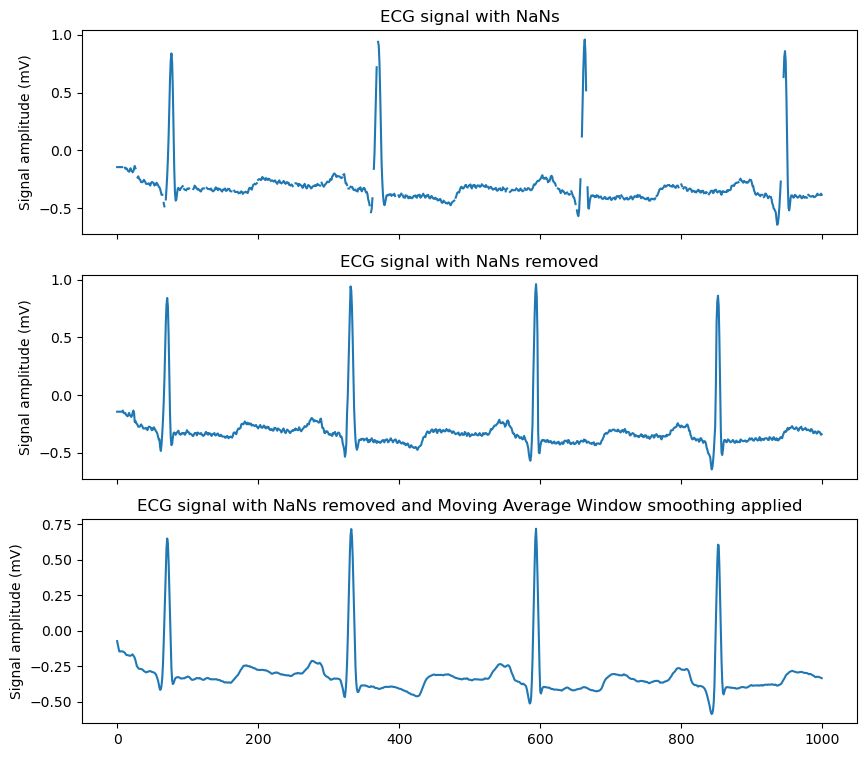

In [23]:
fig, ax = plt.subplots(3, 1,figsize=(10, 9))
ax[0].plot(sig_nan[0:1000])
ax[0].set_ylabel('Signal amplitude (mV)')
ax[0].set_xticklabels([])
ax[0].set_title('ECG signal with NaNs')

ax[1].plot(sig_clean[0:1000])
ax[1].set_ylabel('Signal amplitude (mV)')
ax[1].set_xticklabels([])
ax[1].set_title('ECG signal with NaNs removed')

ax[2].plot(maw_sig[0:1000])
ax[2].set_ylabel('Signal amplitude (mV)')
ax[2].set_title('ECG signal with NaNs removed and Moving Average Window smoothing applied')
plt.show()

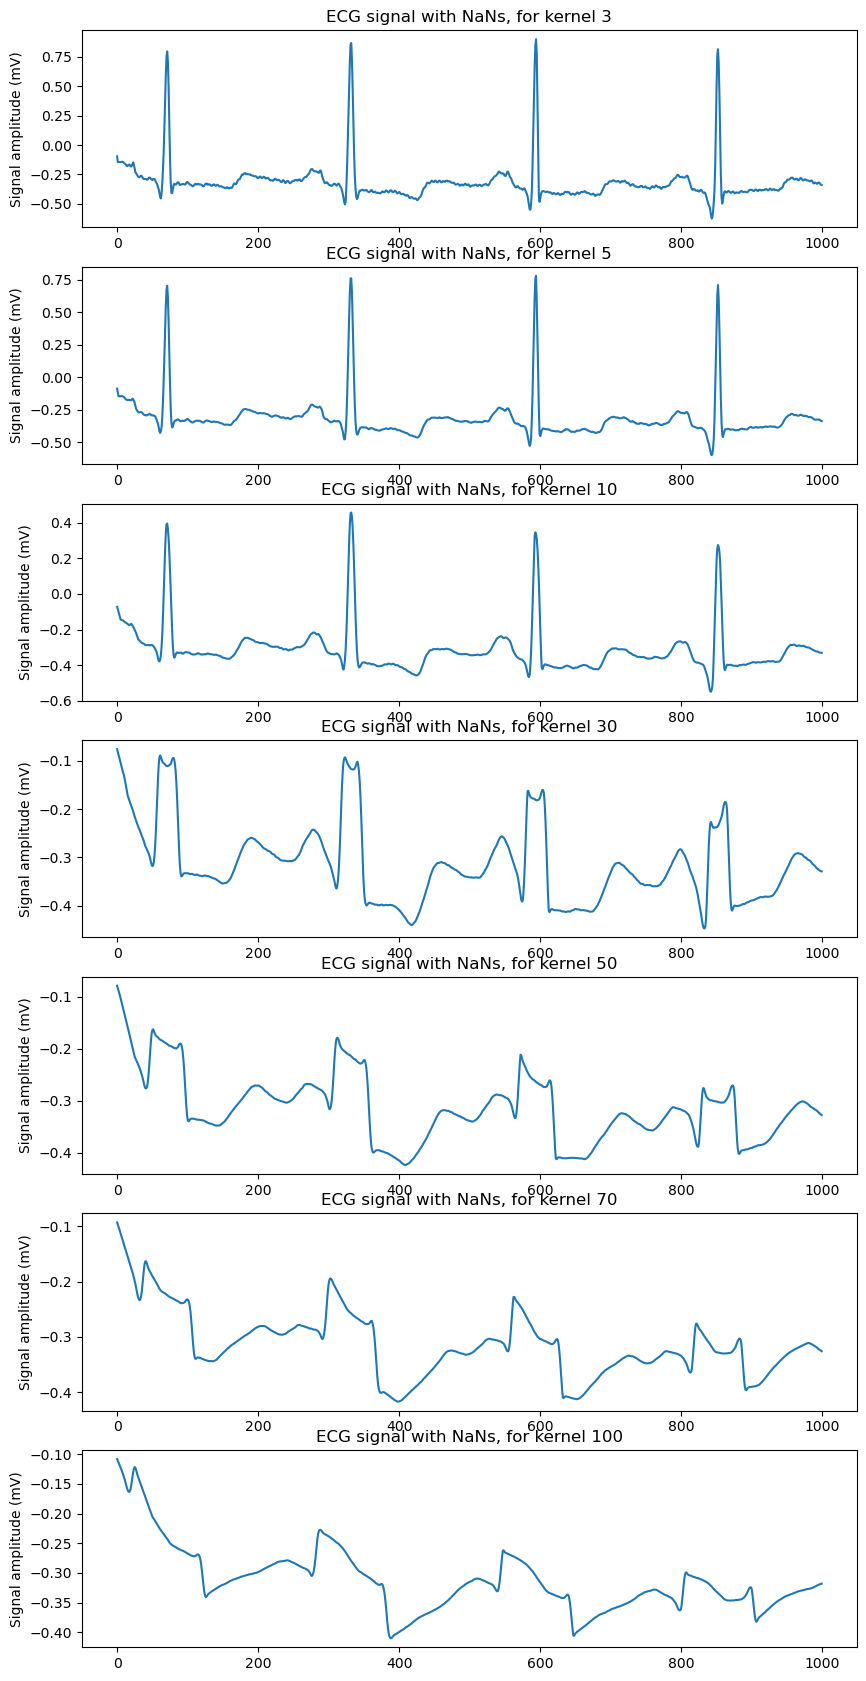

In [24]:
# As we have seen before, we can also visualise how different smoothing kernels affect the signal.

def MAW_multiple(signal, *k):
    all_signals = {}

    # pad the signal with with 0s to avoid edge effect:
    for k_i in k:
        half_window = k_i//2
        padded_signal = np.concatenate((np.zeros(half_window), signal, np.zeros(half_window))) # We have gone over the np.concatenate function in section 1.
        
        kernel = np.ones(k_i)/k_i
        if k_i > 1:
            all_signals[k_i] = np.convolve(padded_signal, kernel, mode='valid') 
        else:
            print("k must be greater than 1")

    return all_signals
     

kernels = (3, 5, 10, 30, 50, 70, 100)
maw_sigs = MAW_multiple(sig_clean, *kernels)

fig, ax = plt.subplots(len(kernels), 1,figsize=(10, len(kernels)*3))
for i, k_i in enumerate(kernels):
    ax[i].plot(maw_sigs[k_i][0:1000])
    ax[i].set_ylabel('Signal amplitude (mV)')
    ax[i].set_title(f'ECG signal with NaNs, for kernel {k_i}')


We can see how the choice of kernel will severely affect the quality of our signal and thus, the quality of our features.

If we wanted to continue with this preprocesing, we would have to compare how each of the kernels affects the signal quality. However, for the sake of the exercise and simplicity, we will arbitrarily choose kernel size 10.

In [25]:
maw_sigs = MAW(sig_clean, 10)

In [26]:
# Method 2: Normalization / Scaling

def normalise(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    return (signal - mean) / std

normalised_sig = normalise(sig_clean)

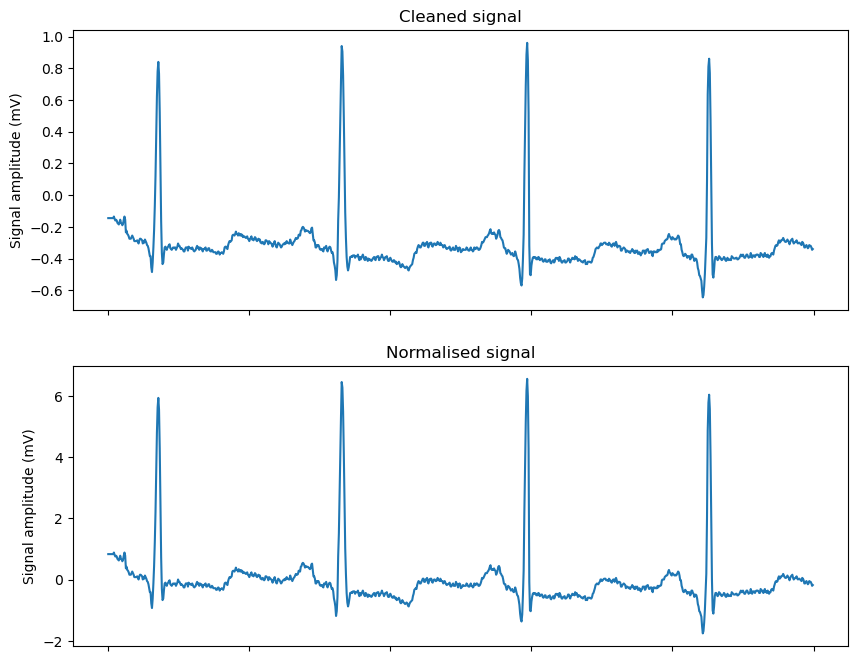

In [27]:
fig, ax = plt.subplots(2, 1,figsize=(10, 8))
ax[0].plot(sig_clean[0:1000])
ax[0].set_ylabel('Signal amplitude (mV)')
ax[0].set_xticklabels([])
ax[0].set_title('Cleaned signal')

ax[1].plot(normalised_sig[0:1000])
ax[1].set_ylabel('Signal amplitude (mV)')
ax[1].set_xticklabels([])
ax[1].set_title('Normalised signal')

plt.show()

##### What do you observe?

- Are there any **temporal differences** between the signals?
- Do you observe **any other notable differences**?

<br><br>


In [ ]:
# Method 3: Filtering (Bandpass filter)

# Without built-in functions, we can't easily design a real digital filter easily.
# However, we can combine two simple moving averages - a high pass effect (substracting a wide smoothing) and a low-pass effect (applying a narrow smoothing)

def dummy_bandpass_filter(signal, low_window=3, high_window=30):
    
    low_passed = MAW(signal, low_window) # the moving average window can serve as a low pass filter
    high_passed  =[]
    for low, high in zip(low_passed, MAW(signal, high_window)):
        high_passed.append(low - high)

    return np.array(high_passed)
    
dummy_band_passed_sig = dummy_bandpass_filter(sig_clean)


# You can also import specific libraries that already do this (more accurately and effectively)
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, low_cutoff=0.5, high_cutoff=30, order=4):
    nyquist = 0.5 * fs
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

bandpass_sig = bandpass_filter(sig_clean)


**Understanding Nyquist Frequency:**
The Nyquist frequency is half the sampling rate (fs/2) and represents the highest frequency that can be accurately represented in a digital signal. This is based on the Nyquist-Shannon sampling theorem, which states that to accurately reconstruct a signal, you must sample at least twice the highest frequency component present in the signal.

**Why Nyquist is Important:**
- **Prevents aliasing**: Sampling below the Nyquist rate causes high-frequency components to appear as lower frequencies, corrupting the signal
- **Defines frequency limits**: Any frequency above Nyquist cannot be properly captured or processed
- **Essential for filter design**: Digital filters must normalize frequencies relative to Nyquist to work correctly

**In Biomedical Signal Processing:**
Nyquist is crucial because:
- **Physiological signals** have specific frequency ranges (e.g., EEG: 0.5-100 Hz, ECG: 0.5-40 Hz)
- **Sampling rates** must be chosen to capture all relevant frequencies while avoiding aliasing
- **Filter design** requires proper frequency normalization to ensure filters work as intended
- **Clinical accuracy** depends on faithful signal representation without artifacts

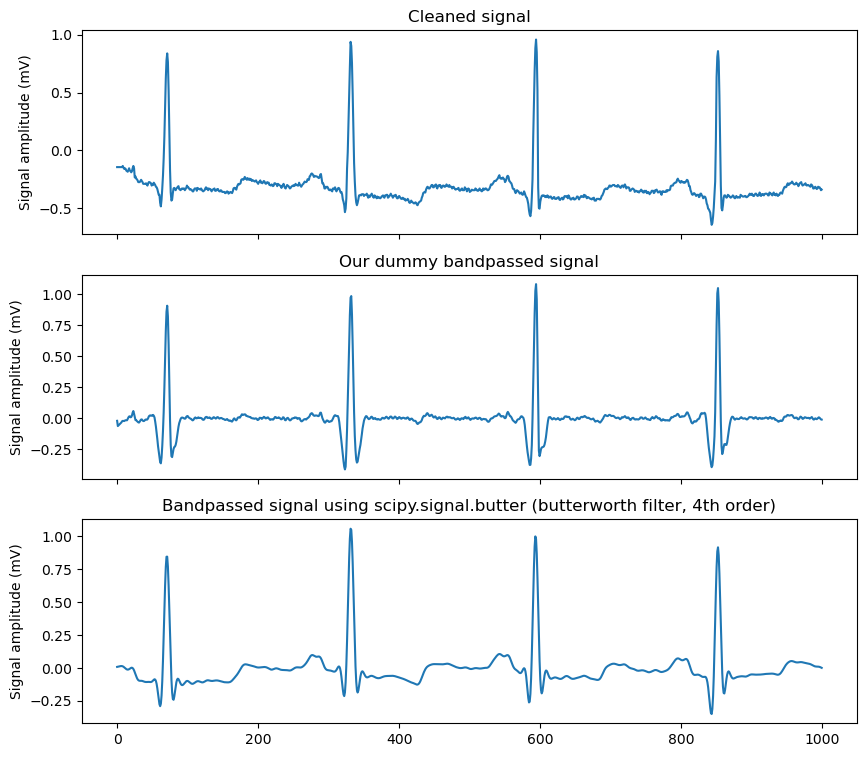

In [29]:
fig, ax = plt.subplots(3, 1,figsize=(10, 9))
ax[0].plot(sig_clean[0:1000])
ax[0].set_ylabel('Signal amplitude (mV)')
ax[0].set_xticklabels([])
ax[0].set_title('Cleaned signal')

ax[1].plot(dummy_band_passed_sig[0:1000])
ax[1].set_ylabel('Signal amplitude (mV)')
ax[1].set_xticklabels([])
ax[1].set_title('Our dummy bandpassed signal')

ax[2].plot(bandpass_sig[0:1000])
ax[2].set_ylabel('Signal amplitude (mV)')
ax[2].set_title('Bandpassed signal using scipy.signal.butter (butterworth filter, 4th order)')
plt.show()

##### What do you observe?

- Are there any **temporal differences** between the signals?
- Do you observe **any other notable differences** or patterns? Why do you think these arise? What could this cause?

<br><br>


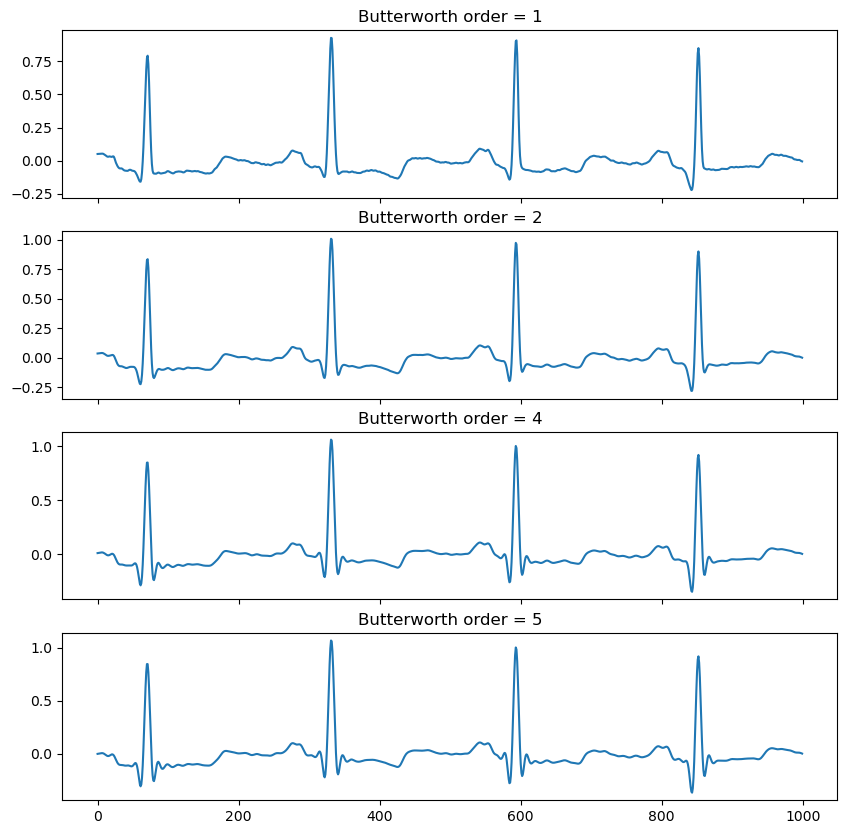

In [ ]:
butter_orders = [1, 2, 4, 5]

# TASK: Plot the bandpassed signal for each of the butterworth orders above.


##### What do you observe?

- What happens if you increase the butterworth filter's order? Why do you think this happens? 

**Hint**: you computer only represents numbers with limited precision. When the coefficients get too extreme, the computer can't handle the calculations accurately anymore. As a result, the math becomes unstable (like dividing by nearly zero), the output may turn into NaNs or 0s, and that's why your plot looks blank.

- What happens if you change the lowpass and highpass cutoff windows? **Try this**

<br><br>


In [32]:
# Method 4: Resampling (Downsampling)

# Similarly to method 3, we can simply and naively downsample the signal by a factor of n by only taking every nth sample.
def dummy_downsample(signal, n):
    return signal[::n]



# or use a built-in function:
from scipy.signal import resample

def resample_signal(signal, new_length):
    return resample(signal, new_length)

dummy_downsample_sig = dummy_downsample(sig_clean, 10)
resampled_sig = resample_signal(sig_clean, len(sig_clean)//10)

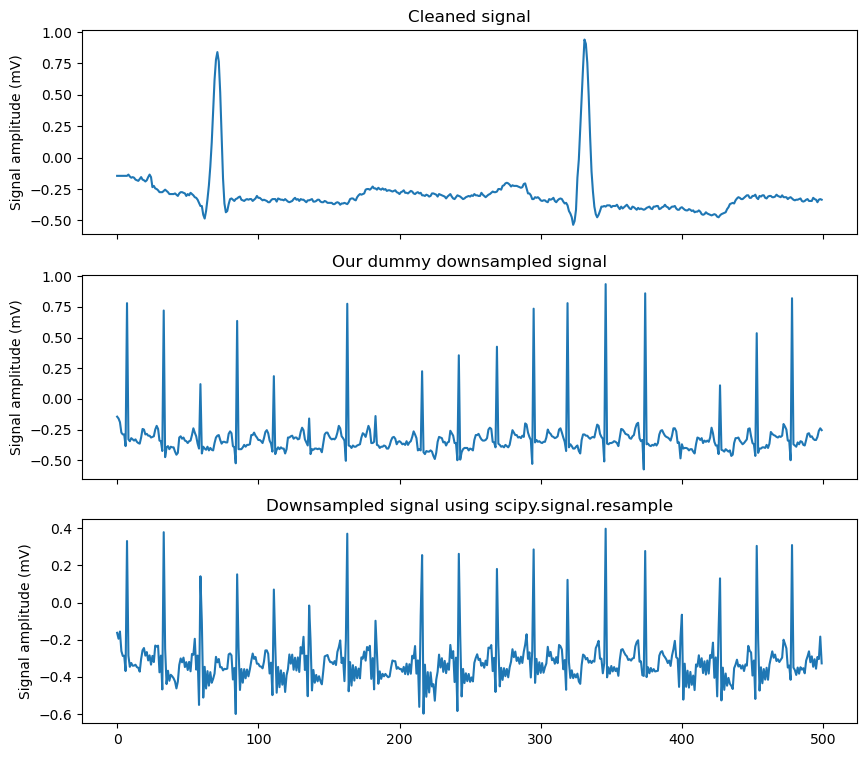

In [33]:
fig, ax = plt.subplots(3, 1,figsize=(10, 9))
ax[0].plot(sig_clean[0:500])
ax[0].set_ylabel('Signal amplitude (mV)')
ax[0].set_xticklabels([])
ax[0].set_title('Cleaned signal')

ax[1].plot(dummy_downsample_sig[0:500])
ax[1].set_ylabel('Signal amplitude (mV)')
ax[1].set_xticklabels([])
ax[1].set_title('Our dummy downsampled signal')

ax[2].plot(resampled_sig[0:500])
ax[2].set_ylabel('Signal amplitude (mV)')
ax[2].set_title('Downsampled signal using scipy.signal.resample')
plt.show()

##### What do you observe?

- Are there any **temporal differences** between the signals?
- Do you observe **any other notable differences** or patterns? Why do you think these arise? What could this cause?

<br><br>


#### 2.3. Beat detection and segmentation

In [34]:
# First, let's cut our signal into a segment of 3000 samples for ease of visualisation
maw_sigs = maw_sigs[:3000]

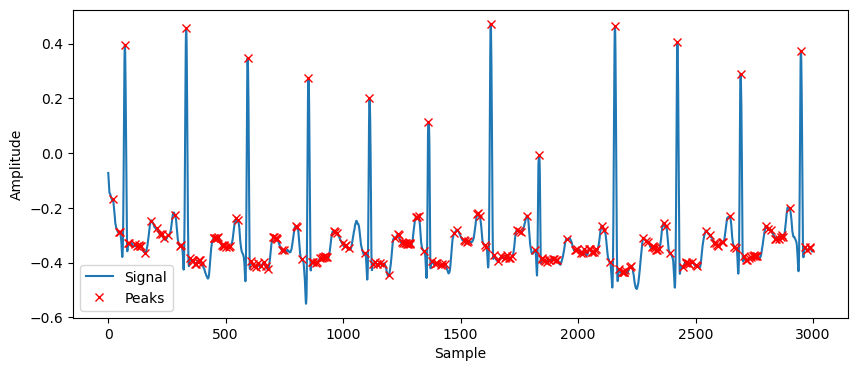

In [35]:
# lets create a function that will take the signal and return the R peaks

def find_rpeaks(signal):
    # find indices where the signal is greater than its neighbors
    return np.where((signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:]))[0] + 1


peaks = find_rpeaks(maw_sigs)

plt.figure(figsize=(10,4))
plt.plot(maw_sigs, label="Signal")
plt.plot(peaks, maw_sigs[peaks], "rx", label="Peaks")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

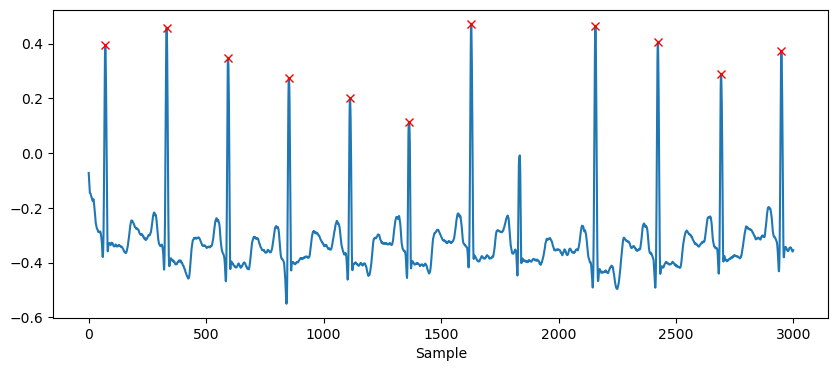

In [36]:
# We can see that the R peaks are not the only local maxima peaks in the signal; noisy elements such as the P and T waves and other local noise is detected. This could be problematic for our feture extraction.
# In the world of signal processing, the signal would require further cleaning and you will learn more about this in other modules. However, as an introduction to python, we will just remove those peaks below a threhsold.

def remove_noise(signal, peaks):
    cleaned_peaks = []
    signal_at_peak = signal[peaks]

    # minimum threshold to be considered an R peak
    threhsold = 0.0

    # create a mask to identify the peaks that are above the threhsold
    mask = signal_at_peak > threhsold
    
    # corrected peaks
    cleaned_peaks = peaks[mask]
    
    return cleaned_peaks

cleaned_peaks = remove_noise(maw_sigs, peaks)

plt.figure(figsize=(10,4))
plt.plot(maw_sigs, label="Signal")
plt.plot(cleaned_peaks, maw_sigs[cleaned_peaks], "rx", label="Peaks") # to get the values of the peaks, we can just index the signal with the peaks ( signal_array[indexes] )
plt.xlabel("Sample")
plt.show()

#### 2.4. Feature extraction

In [38]:
# Now, we have all the information we need to extract some very basic features from the signal. Please note that we are not worried about the quality of how the features fit together for a machine learning model. You will learn more about this in Module 5. 
# We will work only with the signal segmented at 3000 samples (as we defined by maw_sigs = maw_sigs[:3000])

# 1. RR Intervals. Mean and median of the time in between consecutive R peaks.

def rr_intervals(signal, peaks, sampling_freq):
    all_time = []
    for r in range(len(peaks)-1):
        samples = peaks[r+1] - peaks[r]
        time = samples / sampling_freq
        all_time.append(time)
    
    return np.mean(all_time), np.median(all_time)

rr_mean, rr_median = rr_intervals(maw_sigs, cleaned_peaks, fs)
print(f'Mean time between RR intervals: {rr_mean}, median time between RR intervals: {rr_median}')


Mean time between RR intervals: 0.7991666666666666, median time between RR intervals: 0.725


In [ ]:
# TASK: can you think of a more efficient way to do the same thing. The result is exactly the same
    # HINT: numpy provides a function that calculates the difference between a given axis.


# now test this
rr_mean, rr_median = rr_intervals_efficient(maw_sigs, cleaned_peaks, fs)
print(f'Mean time between RR intervals: {rr_mean}, median time between RR intervals: {rr_median}')

Mean time between RR intervals: 0.7991666666666666, median time between RR intervals: 0.725


- This is a nice point to reflect on the different imputation methods. We used the removal of NaNs (for simplicity). However, this would affect the distance between the R-R peaks, influencing the features, and in our case, the main feature: the distance between R-R peaks.

<br><br>



In [40]:
# 2. Average and median magnitude of all the R peaks
def peak_magnitude(signal, peaks):
    rr_mag_mean = np.mean(signal[peaks])
    rr_mag_median = np.median(signal[peaks])
    return rr_mag_mean, rr_mag_median

rr_mag_mean, rr_mag_median = peak_magnitude(maw_sigs, cleaned_peaks)
print(f'Mean amplitude of R peaks: {rr_mag_mean}, median amplitude of R peaks: {rr_mag_median}')


Mean amplitude of R peaks: 0.3446363636363637, median amplitude of R peaks: 0.37400000000000005


In [41]:
# 3. Standard deviation of the magnitude of the R peaks
def peak_magnitude_std(signal, peaks):
    rr_mag_std = np.std(signal[peaks])
    return rr_mag_std

rr_mag_std = peak_magnitude_std(maw_sigs, cleaned_peaks)
print(f'std of the amplitude of the R peaks: {rr_mag_std}')


std of the amplitude of the R peaks: 0.10973834394700609


In [ ]:
# 4. TASK: Calculate the total number of R peaks, and the frequency at which the R peaks occur.


# test this:
rr_freq, total_peaks = peak_frequency(maw_sigs, cleaned_peaks, fs)
print(f'Peak frequency: {rr_freq}peaks/second,   total number of peaks: {total_peaks}')


Peak frequency: 1.3199999999999998peaks/second,   total number of peaks: 11


Instantaneous heart rate is calculated by:

$$
HR_i = \frac{60}{RR_i} (beats/minute)
$$

In [ ]:
# 5. TASK: Fill in the blanks to calculate the instantaneous heart rate

def calculate_average_hr(signal, peaks, sampling_freq):
    mean_rr, _ = rr_intervals(signal, peaks, sampling_freq)
    
    # TYPE YOUR CODE HERE

    return hr

def calculate_instant_hr(signal, peaks, sampling_freq):
    hrs_list = []
    for i in range(len(peaks)):
        if i == 0:
            continue
        else:
            hr = 60 / ((peaks[i] - peaks[i-1]) / sampling_freq)
            hrs_list.append(hr)

    return np.mean(hrs_list)

# We would expect them to be equal if the RR intervals are constant. In most cases, they will not be, and thus, the instantaneous heart rate will be different from the average heart rate. 
# Let's observe how different:

mean_hr = calculate_average_hr(maw_sigs, cleaned_peaks, fs)
instant_hr = calculate_instant_hr(maw_sigs, cleaned_peaks, fs)
print(f'Mean heart rate: {mean_hr:.2f} beats/min,   mean of the instantaneous heart rate calculations: {instant_hr:.2f} beats/min')
    

Mean heart rate: 75.08 beats/min,   mean of the instantaneous heart rate calculations: 78.63 beats/min


#### 2.5. Putting all of this together

In [46]:
# Let's create a pandas dataframe for the features we have created (using as many elements of what we have learned so far)
import pandas as pd

def create_dataframe(sub_id, **kwargs):
    row = {"subject_id": sub_id}
    row.update(kwargs)
    return pd.DataFrame([row])

features = {
    "mean_RR_interval": rr_mean,
    "median_RR_interval": rr_median,
    "mean_RR_amplitude": rr_mag_mean,
    "median_RR_amplitude": rr_mag_median,
    "std_RR_amplitude": rr_mag_std,
    "RR_frequency": rr_freq,
    "total_RR_peaks": total_peaks,
    "mean_heart_rate": mean_hr,
    "instant_heart_rate": instant_hr,
}

df = create_dataframe("S-100", **features)
df

,subject_id,mean_RR_interval,median_RR_interval,mean_RR_amplitude,median_RR_amplitude,std_RR_amplitude,RR_frequency,total_RR_peaks,mean_heart_rate,instant_heart_rate
0,S-100,0.799167,0.725,0.344636,0.374,0.109738,1.32,11,75.078206,78.626422


In [ ]:
# And this way, we can add as many paricipant we want to the dataframe, without having to replicate the code for each subject:


def extract_features_for_all(subject_ids):
    df_all = pd.DataFrame()

    for subject_id in subject_ids:
        
        sig = download_ecg_data(subject_id)

        sig_nan = sig
        maw_sig = MAW(sig_nan, 10)

        maw_sig = maw_sig[:6000]

        peaks = find_rpeaks(maw_sig)
        cleaned_peaks = remove_noise(maw_sig, peaks)

        # calculate features
        rr_mean, rr_median = rr_intervals_efficient(maw_sig, cleaned_peaks, fs)
        rr_mag_mean, rr_mag_median = peak_magnitude(maw_sig, cleaned_peaks)
        rr_freq, total_peaks = peak_frequency(maw_sig, cleaned_peaks, fs)

        features = {
            "mean_RR_interval": rr_mean,
            "median_RR_interval": rr_median,
            "mean_RR_amplitude": rr_mag_mean,
            "median_RR_amplitude": rr_mag_median,
            "std_RR_amplitude": peak_magnitude_std(maw_sig, cleaned_peaks),
            "RR_frequency": rr_freq,
            "total_RR_peaks": total_peaks,
            "mean_heart_rate": calculate_average_hr(maw_sig, cleaned_peaks, fs),
            "instant_heart_rate": calculate_instant_hr(maw_sig, cleaned_peaks, fs)
        }

        df = create_dataframe(sub_id=f"S-{subject_id}", **features)

        df_all = pd.concat([df_all, df], ignore_index=True)
    
    return df_all


subject_ids = ["100", "101", "105", "106", "107", "109"]


df_all = extract_features_for_all(subject_ids)
df_all

,subject_id,mean_RR_interval,median_RR_interval,mean_RR_amplitude,median_RR_amplitude,std_RR_amplitude,RR_frequency,total_RR_peaks,mean_heart_rate,instant_heart_rate
0,S-100,0.811250,0.809722,0.417333,0.40450,0.068323,1.26,21,73.959938,74.340529
1,S-101,0.897531,0.898611,0.593053,0.61500,0.084835,1.14,19,66.850069,66.902480
2,S-102,0.476347,0.777778,0.279515,0.31500,0.113425,2.04,34,125.958650,1043.420134
3,S-103,0.476144,0.559722,0.696114,1.07650,0.542496,2.10,35,126.012354,152.434834
4,S-104,0.338773,0.390278,0.219122,0.09550,0.277483,2.94,49,177.109669,1465.384007
5,S-105,0.722980,0.725000,1.002130,0.98400,0.107843,1.38,23,82.989871,84.559542
6,S-106,0.443619,0.294444,0.898092,0.61225,0.570214,2.28,38,135.251312,194.358822
7,S-107,0.419231,0.347222,1.050225,1.04675,0.335517,2.40,40,143.119266,169.729266
8,S-109,0.393564,0.352778,0.386714,0.38050,0.307636,2.52,42,152.453090,1029.258361


## 3.2 TASK 2. Accelerometer Data

An accelerometer is a sensor that measures acceleration — the rate of change of velocity — along one or more axes (typically x, y, and z). In wearable devices like wristbands, it detects movements such as steps, gestures, or even subtle tremors by measuring changes in acceleration due to motion and gravity. However, accelerometers alone cannot distinguish between linear movement (like walking forward) and rotational movement (like turning your wrist). That’s why they are often paired with a gyroscope, which measures angular velocity — how quickly the device is rotating around each axis. Together, these sensors provide a more complete picture of motion: the accelerometer captures translational acceleration, while the gyroscope captures rotation. In neuroscience and physiology research, accelerometers (wrist-worn, lumbar, chest, etc) are widely used to infer activity patterns, sleep cycles, and motor behaviors, offering a continuous, non-invasive window into participants’ movement dynamics.


The Parkinson’s Disease Smartwatch (PADS) dataset is a multi-modal, annotated wearable sensor dataset collected in a clinical context to support research in movement disorders, especially Parkinson’s disease (PD). 

- Data were acquired via two wrist-worn smartwatches (one on each wrist) and a smartphone application, during clinically guided movement assessments. 
- Participants performed 11 different movement tasks (each 10–20 s) under guidance, designed by neurologists to elicit movement-related phenotypes; the sensors recorded acceleration and rotation signals during the tasks. 
- In addition to sensor time series, the dataset includes metadata and annotations: demographics (age, gender, height, weight), medical history, diagnosis (PD, differential diagnoses, healthy controls), and “non-motor” symptoms (via questionnaire) relevant to PD.


In this section, we will only work with the triaxial acceleromter data in the same way we did with the ECG

In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### 3.2.1 Load the data

In [50]:
# lets load the data:
original_data = pd.read_csv("pads10_accelerometer_data.csv")


In [51]:
# we can see the dataframe:
original_data

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist
0,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist
1,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,1,Relaxed,LeftWrist
2,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist
3,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,1,Relaxed,LeftWrist
4,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist
...,...,...,...,...,...,...,...,...,...,...
286715,287.348301,-0.010799,-0.014519,2.704642e-02,-0.008807,-0.047071,-0.075114,10,Entrainment,RightWrist
286716,287.358366,-0.004689,-0.016576,2.908126e-02,0.005117,-0.052290,-0.080429,10,Entrainment,RightWrist
286717,287.368694,-0.006375,-0.015545,2.615968e-02,0.029638,-0.049946,-0.079373,10,Entrainment,RightWrist
286718,287.378754,-0.002194,-0.014229,2.901689e-02,0.053075,-0.045462,-0.074068,10,Entrainment,RightWrist


<div style="background-color:transparent; border-left:5px solid #5DADE2; padding:15px; border-radius:8px;">

<h3 style="color:#2C3E50;">DataFrame Columns Description</h3>

**The columns of the dataset are:**

| **Column** | **Description** |
|:------------|:----------------|
| **`subject_id`** | Unique identification number for each participant. |
| **`wrist`** | Indicates which wrist the accelerometer sensor was placed on *(e.g., left or right)*. |
| **`task`** | Label representing the task being performed — there are **11 unique task labels**. |
| **`t_s`** | Timestamp in **seconds** since the start of recording. |
| **`Acc_X`**, **`Acc_Y`**, **`Acc_Z`** | Acceleration along the **x**, **y**, and **z** axes respectively, measured in **g units** (standard gravity). |
| **`fs_hz`** | Sampling frequency in **Hertz (Hz)** — the number of samples recorded per second. |

</div>


In [52]:
# or only the first few rows:
original_data.head()

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist
0,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist
1,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,1,Relaxed,LeftWrist
2,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist
3,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,1,Relaxed,LeftWrist
4,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist


In [55]:
# in a similar way that we did for the arrays, we can obtain the basic statistic or information about the dataframe:
original_data['task'].describe()

# the results indicate that:
# There is a total of 286720 rows, but only 11 unique labels for the task column. The most common task is "Relaxed", and it appears 39960 times


count      286720
unique         11
top       Relaxed
freq        40960
Name: task, dtype: object

In [56]:
original_data['task'].value_counts()
# this shows the number of occurences for each unique label. REMEMBER that this dataframe contains 10 participants, so the output is reprepesenting all of them.

task
Relaxed        40960
RelaxedTask    40960
Entrainment    40960
StretchHold    20480
LiftHold       20480
PointFinger    20480
HoldWeight     20480
DrinkGlas      20480
CrossArms      20480
TouchIndex     20480
TouchNose      20480
Name: count, dtype: int64

In [57]:
original_data['wrist'].describe()

count        286720
unique            2
top       LeftWrist
freq         143360
Name: wrist, dtype: object

In [58]:
original_data['wrist'].value_counts()

wrist
LeftWrist     143360
RightWrist    143360
Name: count, dtype: int64

In [59]:
original_data.shape # 275720 rows, 8 columns

(286720, 10)

In [60]:
# Let us work with only one subject for now:
data = original_data[original_data['subject_id'] == 1] # only select the data for which subject_id matches the desired number
data

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist
0,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist
1,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,1,Relaxed,LeftWrist
2,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist
3,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,1,Relaxed,LeftWrist
4,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist
...,...,...,...,...,...,...,...,...,...,...
28667,287.343076,0.011910,-0.000820,7.057069e-03,-0.012770,0.074248,0.002450,1,Entrainment,RightWrist
28668,287.353145,0.018005,-0.005750,1.680392e-02,-0.010635,0.074210,-0.006043,1,Entrainment,RightWrist
28669,287.363217,0.012413,-0.008739,2.263230e-02,-0.010595,0.069931,-0.011354,1,Entrainment,RightWrist
28670,287.373328,0.009851,-0.012696,3.039986e-02,-0.006272,0.063563,-0.017731,1,Entrainment,RightWrist


In [61]:
data.shape # we see this has reduced since we are only working with one subject


(28672, 10)

In [62]:
data.describe() # we can also see the basic statistics for the entire dataframe, in the non-tabular data columns:

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id
count,28672.000000,28672.000000,28672.000000,28672.000000,28672.000000,28672.000000,28672.000000,28672.0
mean,143.669216,-0.043899,0.001477,0.016074,0.005617,-0.040012,0.003888,1.0
std,82.957582,0.154320,0.145600,0.164097,1.068781,0.910744,1.287424,0.0
min,0.000000,-3.698474,-2.243754,-3.476660,-13.293817,-5.754505,-6.996271,1.0
25%,71.829461,-0.012199,-0.006571,-0.004899,-0.023298,-0.019410,-0.013498,1.0
50%,143.697174,-0.001333,0.000325,0.000380,0.000309,0.000193,0.001263,1.0
75%,215.493879,0.003086,0.008129,0.009011,0.022043,0.019468,0.019347,1.0
max,287.383351,1.089151,2.577577,0.994311,11.249531,4.841117,7.289943,1.0


In [ ]:
# However, these stats are not very informative as we have calculated them for the entire signal. They are not divided by task, window, etc.

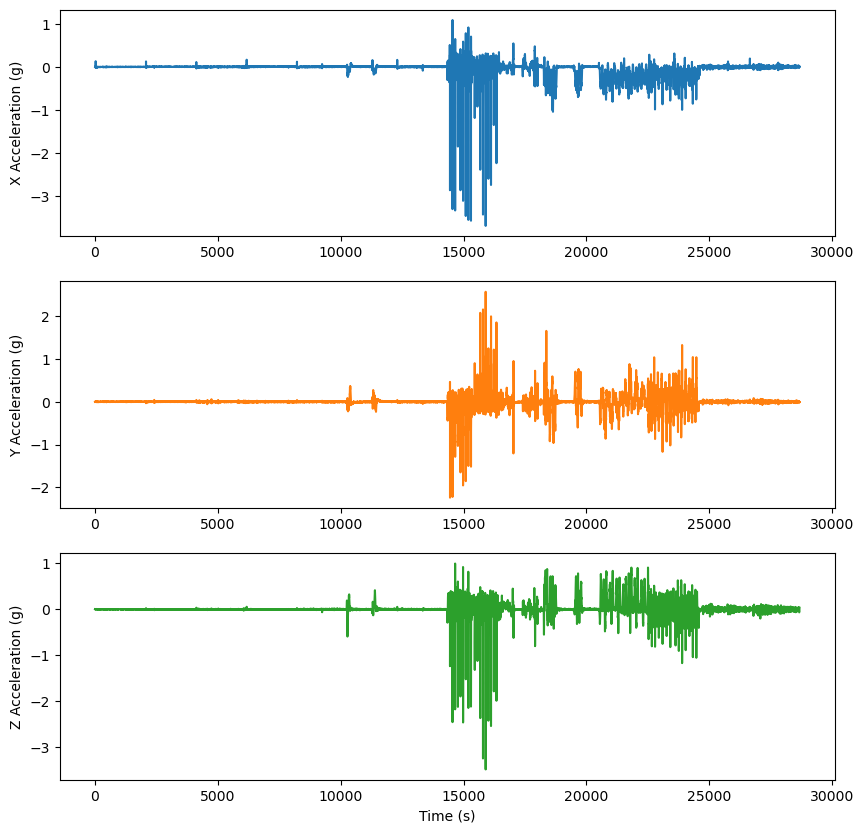

In [63]:
# Let's visualise our dataset:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].plot(data['Acc_X'])
ax[0].set_ylabel('X Acceleration (g)')
ax[1].plot(data['Acc_Y'], color='tab:orange')
ax[1].set_ylabel('Y Acceleration (g)')
ax[2].plot(data['Acc_Z'], color='tab:green') # we can change the color of the plot by using the default python colors (tab:colorname)
ax[2].set_ylabel('Z Acceleration (g)')
ax[2].set_xlabel('Time (s)')

plt.show()

In [64]:
data

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist
0,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist
1,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,1,Relaxed,LeftWrist
2,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist
3,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,1,Relaxed,LeftWrist
4,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist
...,...,...,...,...,...,...,...,...,...,...
28667,287.343076,0.011910,-0.000820,7.057069e-03,-0.012770,0.074248,0.002450,1,Entrainment,RightWrist
28668,287.353145,0.018005,-0.005750,1.680392e-02,-0.010635,0.074210,-0.006043,1,Entrainment,RightWrist
28669,287.363217,0.012413,-0.008739,2.263230e-02,-0.010595,0.069931,-0.011354,1,Entrainment,RightWrist
28670,287.373328,0.009851,-0.012696,3.039986e-02,-0.006272,0.063563,-0.017731,1,Entrainment,RightWrist


In [ ]:
# Let's visualise the data more closely (zoomed-in). But first, we need to know the sampling rate of the signal.

# TASK: calculate the mean sampling rate of the signal for this participant.
    # HINT: numpy provides a function that calculates the difference between a given axis.




print(f'The mean sampling rate for subject 1 is {fs}')

The mean sampling rate for subject 1 is 99.34141899304203


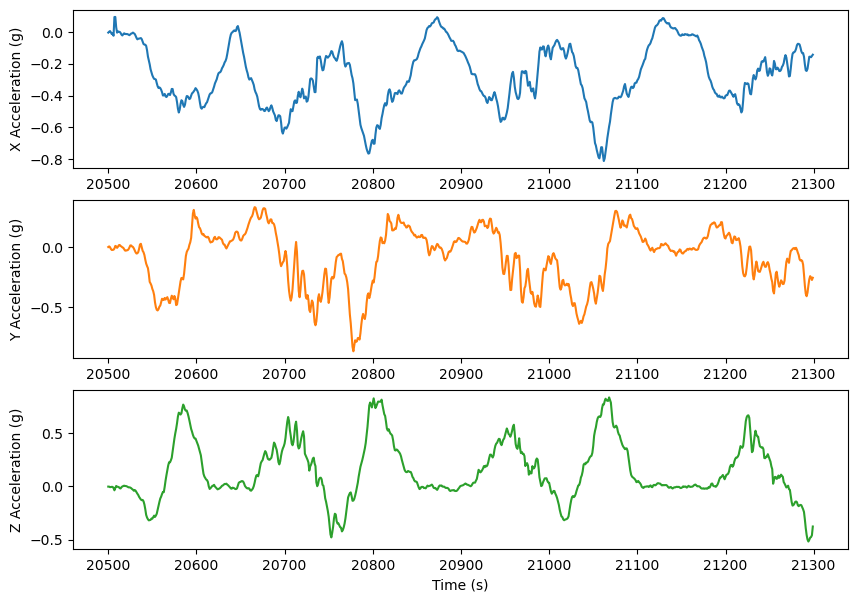

In [73]:
# This section contains 800 samples. If we round the previously calculated sampling frequency to 100Hz, 
# this snipped of code shows the triaxial accelerometery data for a total of 8 seconds. 

fig, ax = plt.subplots(3,1,figsize=(10,7))
ax[0].plot(data['Acc_X'][20500:21300])
ax[0].set_ylabel('X Acceleration (g)')
ax[1].plot(data['Acc_Y'][20500:21300], color='tab:orange')
ax[1].set_ylabel('Y Acceleration (g)')
ax[2].plot(data['Acc_Z'][20500:21300], color='tab:green') # we can change the color of the plot by using the default python colors (tab:colorname)
ax[2].set_ylabel('Z Acceleration (g)')
ax[2].set_xlabel('Time (s)')

plt.show()

As you can see our data can be characterised by a prominent large oscillations which mask the smaller oscillations. These large oscillations are most likely the rotational movement of the activity being performed.


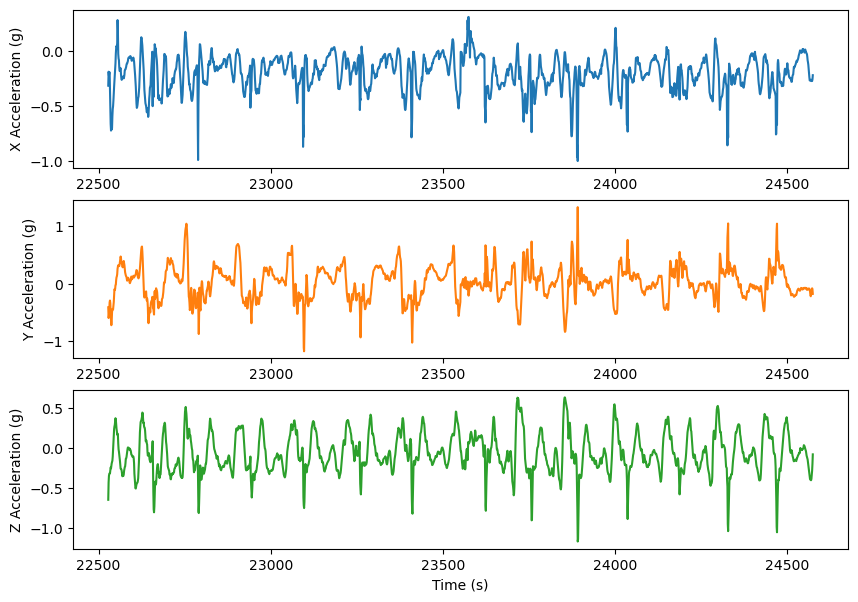

In [ ]:
# Task: Can you plot the data for a specific task? For example, TouchNose





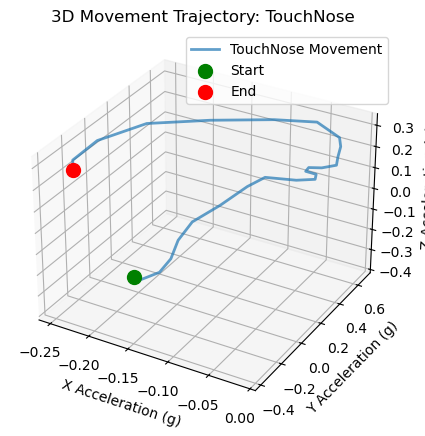

In [75]:
# It might be too hard to understand how that plot represents the "Touching Nose" task. 
# Do not worry, here is a simple visualisation in the triaxial plot.
# Note: This time, the X axis is NOT the time. The three axis represent the magnitude of the axial acceleration. 
# This just mean is the "movement" performed in that axis.

# Don't worry about the code below, this is just a funciton for visualization purposes

def plot_3d_trajectory(data, task_name,start_sample, end_sample, subject_id=1):

    task_data = data[(data['task'] == task_name) & (data['subject_id'] == subject_id) & (data['wrist'] == 'LeftWrist')]
    task_data = task_data.iloc[start_sample:end_sample]
    
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(task_data['Acc_X'], task_data['Acc_Y'], task_data['Acc_Z'], 
            linewidth=2, alpha=0.7, label=f'{task_name} Movement')
    
    ax.scatter(task_data['Acc_X'].iloc[0], task_data['Acc_Y'].iloc[0], task_data['Acc_Z'].iloc[0], color='green', s=100, label='Start')
    ax.scatter(task_data['Acc_X'].iloc[-1], task_data['Acc_Y'].iloc[-1], task_data['Acc_Z'].iloc[-1], color='red', s=100, label='End')
    
    ax.set_xlabel('X Acceleration (g)')
    ax.set_ylabel('Y Acceleration (g)')
    ax.set_zlabel('Z Acceleration (g)')
    ax.set_title(f'3D Movement Trajectory: {task_name}')
    ax.legend()
    plt.show()

plot_3d_trajectory(data, 'TouchNose', 512, 540, subject_id=1)

### 3.2.1 Preprocessing

#### 3.2.1.1 Downsample

In [76]:
# We have already found the sampling rate:
fs

np.float64(99.34141899304203)

In [77]:
downsampled_data = data.iloc[::2].copy()

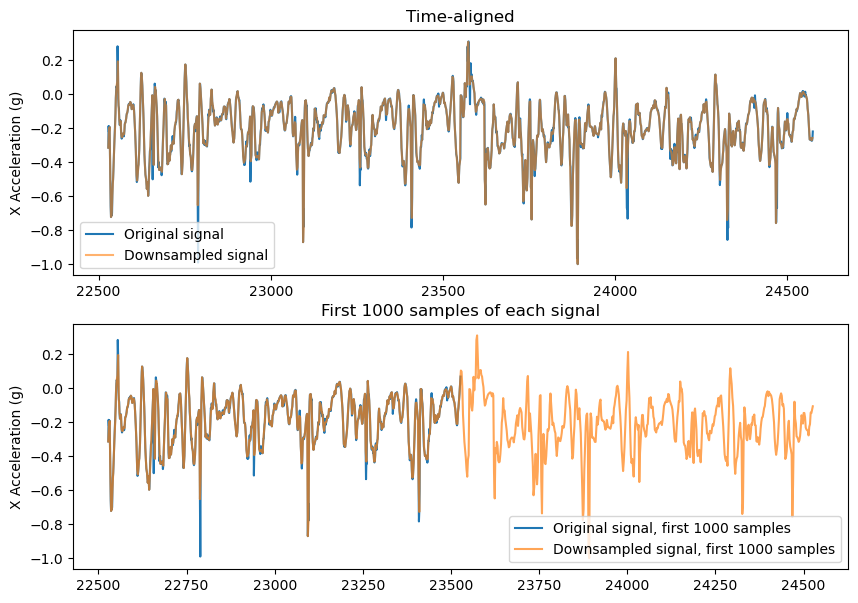

In [78]:
# We can observe the differences for one axis (X-axis)


fig, ax = plt.subplots(2,1,figsize=(10,7))
ax[0].plot(data[data['task'] == 'TouchNose']['Acc_X'], label='Original signal')
ax[0].plot(downsampled_data[downsampled_data['task'] == 'TouchNose']['Acc_X'], label='Downsampled signal', alpha=0.6)
ax[0].set_ylabel('X Acceleration (g)')
ax[0].set_title('Time-aligned')
ax[0].legend()
ax[1].plot(data[data['task'] == 'TouchNose']['Acc_X'][0:1000], label='Original signal, first 1000 samples')
ax[1].plot(downsampled_data[downsampled_data['task'] == 'TouchNose']['Acc_X'][0:1000], color='tab:orange', label='Downsampled signal, first 1000 samples', alpha=0.7)
ax[1].set_ylabel('X Acceleration (g)')
ax[1].set_title('First 1000 samples of each signal')
ax[1].legend()
plt.show()

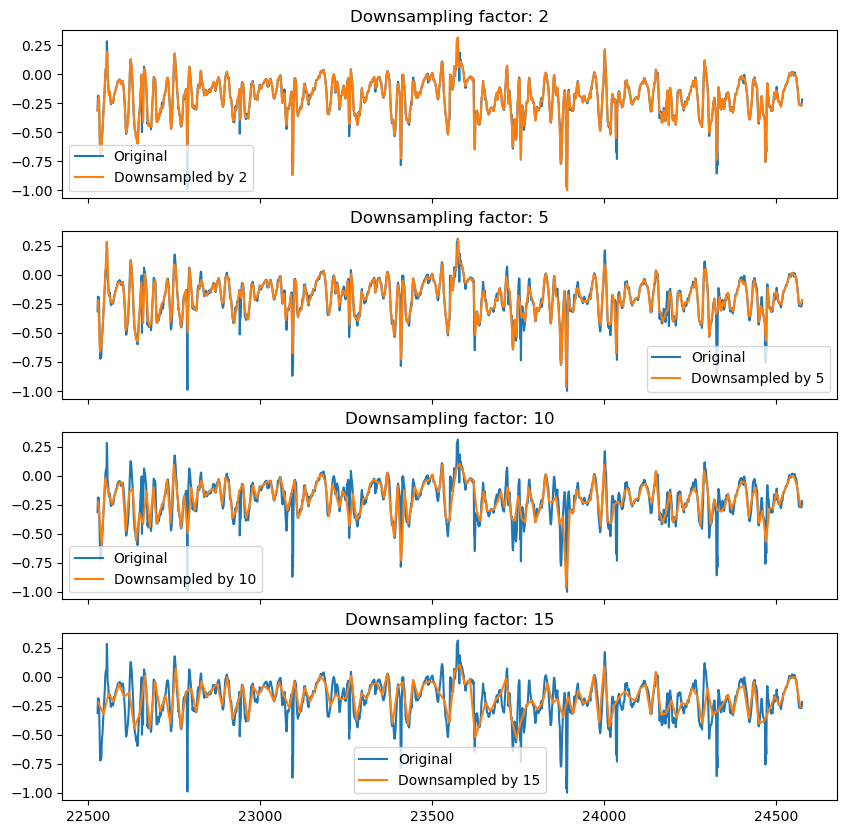

In [ ]:
# TASK: try different downsampling factors to see how they affect the smoothness of the signal.






factors = [2, 5, 10, 15] # Make changes to this to make sure your code works regardless of the value or length of this variable.
downsample_data_comparison(data, 'TouchNose', factors)

In [ ]:
# Task: downsample the data by a factor of 2 for all subjects, all tasks, and both wrists.


all_subs_dowsample

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist
0,0.000000,-0.003958,0.002360,0.001746,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist
2,0.019901,0.000833,0.002225,0.000944,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist
4,0.039984,0.001769,0.004064,-0.001902,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist
6,0.059944,0.004753,0.005929,-0.000923,-0.005622,-0.010597,0.004460,1,Relaxed,LeftWrist
8,0.080140,0.001115,0.000862,-0.000042,-0.008827,-0.012707,0.010851,1,Relaxed,LeftWrist
...,...,...,...,...,...,...,...,...,...,...
286710,287.298155,-0.039670,-0.000465,0.005241,0.018867,-0.036947,-0.024150,10,Entrainment,RightWrist
286712,287.318274,-0.032567,-0.005268,0.008217,0.001644,-0.023492,-0.052806,10,Entrainment,RightWrist
286714,287.338291,-0.018775,-0.012371,0.020105,-0.014267,-0.034344,-0.068736,10,Entrainment,RightWrist
286716,287.358366,-0.004689,-0.016576,0.029081,0.005117,-0.052290,-0.080429,10,Entrainment,RightWrist


#### 2.3.1.2. Bandpass filter

Now that we’ve reduced the number of samples, we can apply a bandpass filter to our signal to remove unwanted noise. 

Remember, as we explained above, the **Butterworth filter** has the general transfer function of:

$$
H(s) = \frac{1}{\sqrt{1 + \left( \frac{s}{\omega_c} \right)^{2n}}}
$$

![](images/filter.png)


In [83]:
# Let's highpass the time-series at 1.5Hz to remove the inlfuence of gravity. First, we need to set the parameters of our filter
from scipy.signal import butter, filtfilt

# We will be using the same function as above. In case you have restarted your kernel, I will paste the same function as we did on ECG.
def bandpass_filter(signal, low_cutoff=0.5, high_cutoff=30, order=4):
    nyquist = 0.5 * fs
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# As you may know, we used this function on a numpy array earlier, and now we have a pandas dataframe with three different columns as the data.
# So... how can we adapt this to do it to the dataframe instead of a numpy array?
    # HINT: we can treat each column of the dataframe as an array


**Understanding `.apply()` and `lambda` in Python**

When working with data in **Pandas**, two incredibly powerful tools are the **`.apply()`** method and **`lambda` functions**. They allow you to apply custom logic to your data efficiently — without writing long loops.

---


**`.apply()` — Apply a Function to a DataFrame or Series**

The `.apply()` method lets you apply a function to each element, row, or column of a Pandas **DataFrame** or **Series**.

**Basic syntax:**
```python
DataFrame.apply(function, axis=0)
```

**Parameters:**

- function: The function you want to apply.

- axis:

  - 0 → apply the function to each column (default).

  - 1 → apply the function to each row.

> **Example:**
>
> ```python
> import pandas as pd
>
> df = pd.DataFrame({
>     'A': [1, 2, 3],
>     'B': [10, 20, 30]
> })
>
> df.apply(sum, axis=0)
> ```

<br>

---



**`lambda()` — Anonymous inline function**

A `lambda` function is a small, unnamed function defined in a single line. It’s great for short, one-off operations that don’t need a full `def` statement


**Basic syntax:**
```python
lambda arguments: expression
```

> **Example:**
>
> ```python
> lambda x: x * 2
> ```

This creates a function that doubles any number passed into it.

> ```Python
> result = (lambda x: x * 2)(5)
> # result = 10
> ```

In [ ]:
# With that explanation, we can now apply the filter function to each accelerometer column like this:
# We can also lowpass our time-series to remove the higher frequencies that we will not be using. 
# In this tutorial we will only be looking up to 10Hz as the energy of normal human movement is between 0 and 3 Hz, and the energy of tremor primarily falls between 3 and 9 Hz. 
# Let's set the parameters for the lowpass filter


# TASK: use lambda and apply to the entire dataset to calculate the bandpass signal for the X, Y, and Z axes:




bandpassed_data

,Acc_X,Acc_Y,Acc_Z
0,-0.009684,-0.000226,0.000505
1,-0.008829,0.000389,-0.000232
2,-0.007910,0.000991,-0.000911
3,-0.007098,0.001540,-0.001472
4,-0.006626,0.001964,-0.001860
...,...,...,...
28667,0.008090,0.001239,-0.004937
28668,0.009718,0.001902,-0.003012
28669,0.009155,0.001429,-0.001912
28670,0.006748,0.000085,-0.001477


In [85]:
# To merge it with the original dataset, we first want to change the column name. 
# We will use this dictionary:
rename_dict = {
    'Acc_X': 'Acc_X_bandpassed',
    'Acc_Y': 'Acc_Y_bandpassed',
    'Acc_Z': 'Acc_Z_bandpassed'
}

bandpassed_data = bandpassed_data.rename(columns=rename_dict)
bandpassed_data

,Acc_X_bandpassed,Acc_Y_bandpassed,Acc_Z_bandpassed
0,-0.009684,-0.000226,0.000505
1,-0.008829,0.000389,-0.000232
2,-0.007910,0.000991,-0.000911
3,-0.007098,0.001540,-0.001472
4,-0.006626,0.001964,-0.001860
...,...,...,...
28667,0.008090,0.001239,-0.004937
28668,0.009718,0.001902,-0.003012
28669,0.009155,0.001429,-0.001912
28670,0.006748,0.000085,-0.001477


In [86]:
# Now that we know the data will not have the same column names when we concatenate the dataframes,
data = pd.concat([data, bandpassed_data], axis=1)
data

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist,Acc_X_bandpassed,Acc_Y_bandpassed,Acc_Z_bandpassed
0,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist,-0.009684,-0.000226,0.000505
1,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,1,Relaxed,LeftWrist,-0.008829,0.000389,-0.000232
2,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist,-0.007910,0.000991,-0.000911
3,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,1,Relaxed,LeftWrist,-0.007098,0.001540,-0.001472
4,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist,-0.006626,0.001964,-0.001860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28667,287.343076,0.011910,-0.000820,7.057069e-03,-0.012770,0.074248,0.002450,1,Entrainment,RightWrist,0.008090,0.001239,-0.004937
28668,287.353145,0.018005,-0.005750,1.680392e-02,-0.010635,0.074210,-0.006043,1,Entrainment,RightWrist,0.009718,0.001902,-0.003012
28669,287.363217,0.012413,-0.008739,2.263230e-02,-0.010595,0.069931,-0.011354,1,Entrainment,RightWrist,0.009155,0.001429,-0.001912
28670,287.373328,0.009851,-0.012696,3.039986e-02,-0.006272,0.063563,-0.017731,1,Entrainment,RightWrist,0.006748,0.000085,-0.001477


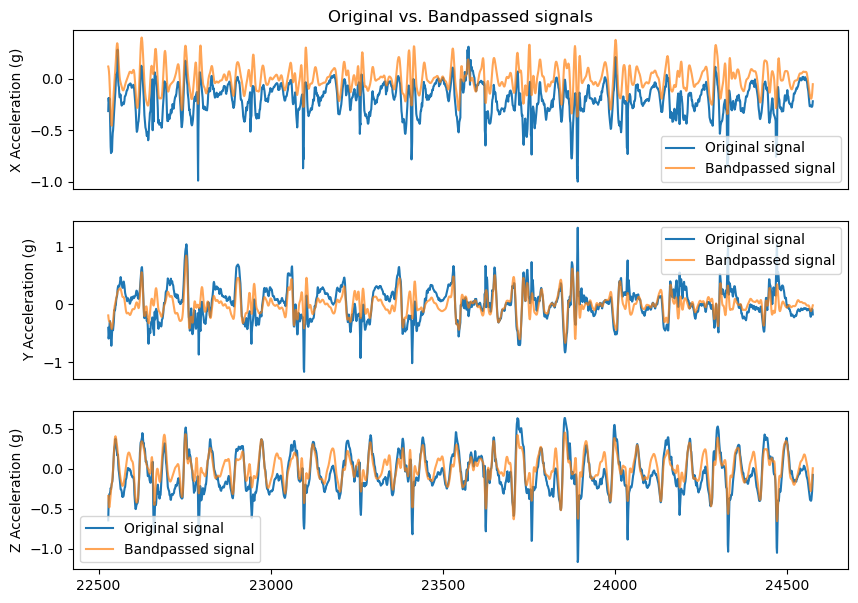

In [90]:
# Task: observe the differences between the filtered and non-filtered data:

fig, ax = plt.subplots(3,1,figsize=(10,7))
ax[0].plot(data[data['task'] == 'TouchNose']['Acc_X'], label='Original signal')
ax[0].plot(data[data['task'] == 'TouchNose']['Acc_X_bandpassed'], label='Bandpassed signal', alpha=0.7)
ax[0].set_ylabel('X Acceleration (g)')
ax[0].set_xticks([])
ax[0].set_title('Original vs. Bandpassed signals')
ax[0].legend()

ax[1].plot(data[data['task'] == 'TouchNose']['Acc_Y'], label='Original signal')
ax[1].plot(data[data['task'] == 'TouchNose']['Acc_Y_bandpassed'], label='Bandpassed signal', alpha=0.7)
ax[1].set_ylabel('Y Acceleration (g)')
ax[1].set_xticks([])
ax[1].legend()

ax[2].plot(data[data['task'] == 'TouchNose']['Acc_Z'], label='Original signal')
ax[2].plot(data[data['task'] == 'TouchNose']['Acc_Z_bandpassed'], label='Bandpassed signal', alpha=0.7)
ax[2].set_ylabel('Z Acceleration (g)')
ax[2].legend()

plt.show()

As you can see our data looks slightly cleaner because we have removed the low frequency oscillations (big sinusoidal waves) as these were noise from the task since the task requires oscillatory movement to turn your hand from facing up to facing down. Also, now you can see that the high-passed signal has less variance in acceleration than the original.

In [ ]:
# Task: Write the code that uses .apply to the entire dataset, for all subjects, both wrists, and all tasks:

 



original_data

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist,Acc_X_bandpassed,Acc_Y_bandpassed,Acc_Z_bandpassed
0,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist,-0.009684,-0.000226,0.000505
1,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,1,Relaxed,LeftWrist,-0.008829,0.000389,-0.000232
2,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist,-0.007910,0.000991,-0.000911
3,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,1,Relaxed,LeftWrist,-0.007098,0.001540,-0.001472
4,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist,-0.006626,0.001964,-0.001860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286715,287.348301,-0.010799,-0.014519,2.704642e-02,-0.008807,-0.047071,-0.075114,10,Entrainment,RightWrist,-0.015344,-0.011061,0.005198
286716,287.358366,-0.004689,-0.016576,2.908126e-02,0.005117,-0.052290,-0.080429,10,Entrainment,RightWrist,-0.009494,-0.009988,0.004906
286717,287.368694,-0.006375,-0.015545,2.615968e-02,0.029638,-0.049946,-0.079373,10,Entrainment,RightWrist,-0.005435,-0.008737,0.004675
286718,287.378754,-0.002194,-0.014229,2.901689e-02,0.053075,-0.045462,-0.074068,10,Entrainment,RightWrist,-0.003101,-0.007464,0.004452


#### 2.3.1.3. Windowing

Now that we have cleaned our data, the final step is windowing or epoching the data. This means that we will split our dataset into shorter time periods. This will allow us to track features better across the time-domain as some features can be better captured over shorter periods of time due to their transient nature.
Our data will be divided into 3s windows with a 1.5s overlap (50%). 

**Overlap in Signal Processing:**
Overlap refers to the portion of consecutive windows that share the same time period. In our case, with 3s windows and 1.5s overlap (50%), each new window starts 1.5s before the previous window ends. This overlap helps ensure that transient features occurring at window boundaries aren't lost and provides smoother transitions between windows, improving feature extraction reliability.

Our data will be divided into 3s windows with a 1.5s overlap (50%). Visually, you can see (a) has no overlap, and (b) shows a 50% overlap. 

<img src="images/windowing_example.png" width="80%">


**Why Overlap is Crucial in Biomedical Signals:**
In biomedical signal processing, overlap is particularly important because biological signals often contain:
- **Transient events** (like spikes, artifacts, or brief physiological changes) that might occur exactly at window boundaries
- **Non-stationary characteristics** where signal properties change rapidly over time
- **Critical diagnostic information** that could be missed if split across window boundaries without overlap

Without overlap, important physiological events could be artificially divided between windows, leading to incomplete feature extraction and potentially missing clinically relevant information. The overlap ensures continuity and captures the full temporal dynamics of biological processes.


In [92]:
# First let's determine how many samples we will have per window. 
# We will need to multiply the length of the window in seconds by the sampling frequency:
n = 3*fs
n = int(n)
n

298

In [93]:
# What is the number of samples in the overlap?
p = 1.5*fs
p = int(p)
p

149

In [94]:
# Now let's window the data for the TouchNose task, RigthWrist, along all 3 axes: 

snippet = original_data[(original_data['subject_id'] == 1) & (original_data['wrist'] == 'RightWrist') & (original_data['task'] == 'TouchNose')]
snippet

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist,Acc_X_bandpassed,Acc_Y_bandpassed,Acc_Z_bandpassed
23552,236.017793,-0.006508,-0.014999,-0.040826,-0.178650,0.121825,0.035431,1,TouchNose,RightWrist,0.031826,-0.064785,-0.070136
23553,236.027650,-0.006060,-0.005656,-0.042481,-0.364945,0.184182,0.084353,1,TouchNose,RightWrist,0.091500,0.030345,-0.112865
23554,236.037828,-0.008759,-0.011491,-0.083869,-0.506812,0.177741,0.100312,1,TouchNose,RightWrist,0.122097,0.103387,-0.152612
23555,236.047887,-0.013667,-0.023748,-0.132318,-0.508665,0.252981,0.086539,1,TouchNose,RightWrist,0.121661,0.149214,-0.186512
23556,236.057891,-0.036793,0.017605,-0.185384,-0.478703,0.351979,0.095076,1,TouchNose,RightWrist,0.095892,0.168332,-0.212080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24571,246.275736,-0.272652,-0.141955,-0.384558,2.848778,2.905652,-1.980304,1,TouchNose,RightWrist,-0.191151,-0.106823,-0.243177
24572,246.285965,-0.271114,-0.102148,-0.341117,3.693127,3.186574,-2.339267,1,TouchNose,RightWrist,-0.175693,-0.089321,-0.194102
24573,246.296179,-0.272382,-0.077111,-0.285100,4.605932,3.450963,-2.721614,1,TouchNose,RightWrist,-0.146390,-0.066314,-0.131114
24574,246.306075,-0.257285,-0.093120,-0.198771,5.404040,3.660339,-3.088033,1,TouchNose,RightWrist,-0.104115,-0.040942,-0.062243


In [95]:
def window_data(data, samples_per_window, overlap_samples):
    end_idx = len(data) - samples_per_window + 1
    step_size = samples_per_window - overlap_samples


    windows = []

    for start_idx in range(0, int(end_idx), int(step_size)):
        window_end_idx = start_idx + samples_per_window

        # extract window data
        window_data = data.iloc[start_idx:window_end_idx].copy()

        windows.append(window_data)
    
    return windows

# apply windowing to the TouchNose snippet
windows = window_data(snippet, samples_per_window=n, overlap_samples=p)
windows

[              t_s     Acc_X     Acc_Y     Acc_Z     Gyro_X    Gyro_Y  \
 23552  236.017793 -0.006508 -0.014999 -0.040826  -0.178650  0.121825   
 23553  236.027650 -0.006060 -0.005656 -0.042481  -0.364945  0.184182   
 23554  236.037828 -0.008759 -0.011491 -0.083869  -0.506812  0.177741   
 23555  236.047887 -0.013667 -0.023748 -0.132318  -0.508665  0.252981   
 23556  236.057891 -0.036793  0.017605 -0.185384  -0.478703  0.351979   
 ...           ...       ...       ...       ...        ...       ...   
 23845  238.967550 -0.419008  0.264694 -0.400092   8.303646  2.979488   
 23846  238.977477 -0.399024  0.159621 -0.294526   9.505704  3.125489   
 23847  238.987800 -0.362002  0.044099 -0.165895  10.449439  3.171752   
 23848  238.997721 -0.293401 -0.103131  0.023323  11.035476  3.131279   
 23849  239.008180 -0.251744 -0.270069  0.207447  11.249531  3.044176   
 
          Gyro_Z  subject_id       task       wrist  Acc_X_bandpassed  \
 23552  0.035431           1  TouchNose  RightWri

### 2.3.2. Quantifying signals in the time domain

Let's start quantifying the oscillations that we have pre-processed for the TouchNose task.


The simplest way to describe oscillatory activity is to use statistical features which capture the distribution of data such as mean and standard deviation (SD).

In [96]:
def extract_window_features(windows):
    features = []
    
    for i, window in enumerate(windows):
        window_features = {'window_id': i}
        
        # Extract features for each accelerometer axis
        for axis in ['Acc_X', 'Acc_Y', 'Acc_Z']:
            data = window[axis]
            
            window_features[f'{axis}_mean'] = data.mean()
            window_features[f'{axis}_median'] = data.median()
            window_features[f'{axis}_max'] = data.max()
            window_features[f'{axis}_min'] = data.min()
        
        features.append(window_features)
    
    return pd.DataFrame(features)

# Apply to your windows
window_features = extract_window_features(windows)


In [97]:
window_features

,window_id,Acc_X_mean,Acc_X_median,Acc_X_max,Acc_X_min,Acc_Y_mean,Acc_Y_median,Acc_Y_max,Acc_Y_min,Acc_Z_mean,Acc_Z_median,Acc_Z_max,Acc_Z_min
0,0,-0.200465,-0.214331,0.311083,-0.736980,0.031271,0.011561,0.733984,-0.707693,-0.064572,-0.079507,0.628688,-0.903358
1,1,-0.250006,-0.231803,0.070487,-0.999864,0.017714,0.031506,1.330764,-0.833104,-0.074592,-0.128199,0.631972,-1.167873
2,2,-0.217507,-0.198691,0.211754,-0.999864,0.007694,0.024240,1.330764,-0.833104,-0.061186,-0.101547,0.631972,-1.167873
3,3,-0.209747,-0.209155,0.211754,-0.732078,0.025777,0.010976,0.762821,-0.522939,-0.063940,-0.087573,0.545101,-0.887093
4,4,-0.222938,-0.217883,0.115908,-0.857190,0.021280,-0.009938,1.048225,-0.485885,-0.045736,-0.075104,0.525467,-1.038304


In [98]:
def extract_stats_features(windows):
    features = []
    
    for i, window in enumerate(windows):
        window_features = {'window_id': i}
        
        # Extract features for each accelerometer axis
        for axis in ['Acc_X', 'Acc_Y', 'Acc_Z']:
            data = window[axis]
            
            window_features[f'{axis}_std'] = data.std()
            window_features[f'{axis}_variance'] = data.var()
            window_features[f'{axis}_iqr'] = data.quantile(0.75) - data.quantile(0.25)
            window_features[f'{axis}_rms'] = np.sqrt(np.mean(data**2))
        
        features.append(window_features)
    
    return pd.DataFrame(features)

stats_features = extract_stats_features(windows)
stats_features


,window_id,Acc_X_std,Acc_X_variance,Acc_X_iqr,Acc_X_rms,Acc_Y_std,Acc_Y_variance,Acc_Y_iqr,Acc_Y_rms,Acc_Z_std,Acc_Z_variance,Acc_Z_iqr,Acc_Z_rms
0,0,0.177701,0.031578,0.252870,0.267690,0.239066,0.057153,0.199883,0.240705,0.263621,0.069496,0.353125,0.270984
1,1,0.169440,0.028710,0.163542,0.301855,0.298883,0.089331,0.251102,0.298906,0.315775,0.099714,0.384110,0.323949
2,2,0.162555,0.026424,0.144954,0.271376,0.274247,0.075211,0.225217,0.273895,0.272053,0.074013,0.284794,0.278403
3,3,0.139779,0.019538,0.188189,0.251926,0.222720,0.049604,0.239233,0.223835,0.233622,0.054579,0.310169,0.241835
4,4,0.144940,0.021008,0.200334,0.265779,0.232967,0.054274,0.290643,0.233547,0.263305,0.069329,0.373289,0.266812


In [ ]:
# TASK: calculate the window features we have calculated above for all subjects, all wrists, all activities. 
# Merge them into a single dataframe.
    # HINT: make sure to align the windows correctly on the same subject, wrist, and task
    # HINT 2: therefore, don't forget to add the subject, wrist, and task information for each window for both feature dataframes



# ADD YOUR CODE HERE







all_features

,window_id,Acc_X_mean,Acc_X_median,Acc_X_max,Acc_X_min,Acc_Y_mean,Acc_Y_median,Acc_Y_max,Acc_Y_min,Acc_Z_mean,...,Acc_Y_variance,Acc_Y_iqr,Acc_Y_rms,Acc_Z_std,Acc_Z_variance,Acc_Z_iqr,Acc_Z_rms,subject_id,wrist,task
0,0,-0.002902,-0.003376,0.131153,-0.023458,0.000612,0.000422,0.011955,-0.010002,0.002232,...,0.000015,0.004537,0.003898,0.002280,0.000005,0.002930,0.003187,1,LeftWrist,Relaxed
1,1,-0.002910,-0.002779,0.003837,-0.009063,-0.000072,0.000016,0.009808,-0.007872,0.001639,...,0.000007,0.003280,0.002712,0.001795,0.000003,0.002587,0.002428,1,LeftWrist,Relaxed
2,2,-0.002653,-0.002727,0.006340,-0.013030,-0.000048,-0.000067,0.009808,-0.008136,0.001405,...,0.000008,0.003624,0.002900,0.001921,0.000004,0.002258,0.002377,1,LeftWrist,Relaxed
3,3,-0.002441,-0.002567,0.006340,-0.013030,0.000102,0.000009,0.007817,-0.008136,0.001182,...,0.000006,0.003344,0.002438,0.001515,0.000002,0.001781,0.001920,1,LeftWrist,Relaxed
4,4,-0.002455,-0.002492,0.003155,-0.006261,0.000348,0.000449,0.005625,-0.007086,0.001055,...,0.000004,0.002801,0.002102,0.001179,0.000001,0.001623,0.001581,1,LeftWrist,Relaxed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,7,0.005481,0.008197,0.091504,-0.068338,-0.001021,0.001526,0.067173,-0.070982,0.002250,...,0.000709,0.033398,0.026608,0.027324,0.000747,0.042713,0.027371,10,RightWrist,Entrainment
1516,8,0.005312,0.006893,0.091504,-0.057178,0.000932,0.001450,0.067173,-0.070982,0.002624,...,0.000883,0.044626,0.029680,0.039599,0.001568,0.054165,0.039619,10,RightWrist,Entrainment
1517,9,0.002984,0.002521,0.087801,-0.039681,0.000345,-0.001347,0.076633,-0.079662,0.002066,...,0.000888,0.044129,0.029759,0.047920,0.002296,0.082181,0.047884,10,RightWrist,Entrainment
1518,10,0.003185,0.002436,0.057052,-0.038168,-0.001755,-0.003224,0.076633,-0.079662,0.000903,...,0.000750,0.032244,0.027391,0.038262,0.001464,0.060330,0.038208,10,RightWrist,Entrainment


### 2.3.3. Quantifying signals in the frequency domain

<p> Now let's move to the frequency-domain as this will allow us to look at how much presence different frequencies have in our sample.</p> 
<br>
<hr style="border:1px solid #BDC3C7;"> 

<h3 style="color:#34495E;">1. Understanding the Fourier Transform:</h3> 
<div style="background-color:transparent; border-left:5px solid #85929E; padding:10px; margin-bottom:15px;"> 
The Fourier Transform is a mathematical tool that decomposes a time-domain signal into its constituent frequency components. Think of it like breaking down a musical chord into its individual notes - it tells us which frequencies (or "notes") are present in our signal and how much energy each frequency contributes.


**Key Concepts:**
- **Time domain**: Shows how a signal changes over time (amplitude vs. time)
- **Frequency domain**: Shows which frequencies are present and their strength (amplitude vs. frequency)
- **Decomposition**: Any complex signal can be represented as a sum of sine waves at different frequencies
- **Reversible**: The inverse Fourier Transform can reconstruct the original time-domain signal


**In Biomedical Context:**
For biological signals like EEG or ECG, the Fourier Transform helps us:
- Identify physiological rhythms (heart rate, brain waves)
- Detect pathological patterns (arrhythmias, seizure activity)
- Separate signal from noise based on frequency content
- Quantify spectral features for diagnosis and monitoring

This visualization demonstrates how a complex time-domain signal can be decomposed into its frequency components.

<img src="images/FFT.png" width="40%">

</div> 


<h3 style="color:#34495E;">2. Understanding Power Spectral Density (PSD):</h3> 
<div style="background-color:transparent; border-left:5px solid #5DADE2; padding:10px; margin-bottom:15px;"> 
Power Spectral Density measures how the power (energy) of a signal is distributed across different frequencies. It transforms a time-domain signal into the frequency domain, showing which frequencies contain the most energy. PSD is calculated as the squared magnitude of the Fourier transform, normalized by frequency resolution.


**Why PSD is Important:**
- **Frequency analysis**: Reveals the dominant frequency components in a signal
- **Signal characterization**: Identifies periodic patterns, oscillations, and noise
- **Feature extraction**: Provides quantitative measures of spectral content
- **Noise identification**: Helps distinguish signal from noise based on frequency content


**In Biomedical Signal Processing:**
PSD is crucial because:
- **Physiological rhythms** have characteristic frequency signatures (e.g., alpha waves: 8-13 Hz, beta waves: 13-30 Hz)
- **Disease diagnosis** often relies on frequency analysis (e.g., detecting arrhythmias in ECG, seizure patterns in EEG)
- **Treatment monitoring** tracks changes in spectral features over time
- **Artifact detection** identifies non-physiological frequency components
- **Research applications** analyze brain connectivity, sleep stages, and neural oscillations

</div> 




The first step is to use Welch's power spectral density estimate (PSD) to transform our signal into the frequency domain.

In [108]:
from scipy import signal
# Let's calculate the PSD for the TouchNose task
# here, p, is the power spectrum and f is the frequency range

def calculate_psd(data, sampling_rate):
    psd_results = {}
    
    for axis in ['Acc_X', 'Acc_Y', 'Acc_Z']:
        signal_data = data[axis].values
        
        # Calculate PSD using Welch's method
        frequencies, power_spectrum = signal.welch(
            signal_data, 
            fs=sampling_rate,
            nperseg=min(256, len(signal_data)),  # Window size
            noverlap=None,  # Default overlap
            scaling='density'  # Power spectral density
        )
        
        psd_results[axis] = {
            'frequencies': frequencies,
            'power': power_spectrum
        }
    
    return psd_results

psd_results = calculate_psd(snippet, sampling_rate=int(fs))


In [109]:
print("Frequency ranges:")
for axis in ['Acc_X', 'Acc_Y', 'Acc_Z']:
    f = psd_results[axis]['frequencies']
    print(f"{axis}: {f[0]:.2f} - {f[-1]:.2f} Hz")


Frequency ranges:
Acc_X: 0.00 - 49.50 Hz
Acc_Y: 0.00 - 49.50 Hz
Acc_Z: 0.00 - 49.50 Hz


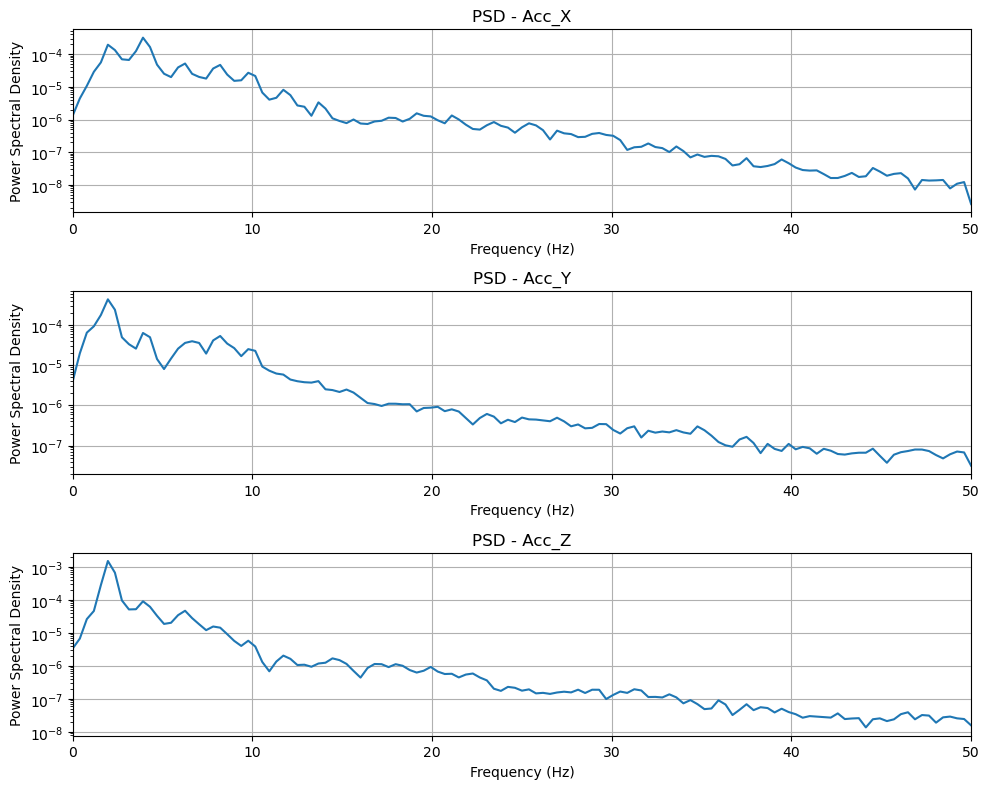

In [105]:
# Let's observe the data

fig, axes = plt.subplots(3, 1, figsize=(10, 8))
axes = axes.flatten()

for i, axis in enumerate(['Acc_X', 'Acc_Y', 'Acc_Z']):
    f = psd_results[axis]['frequencies']
    p = psd_results[axis]['power']
    
    axes[i].semilogy(f, p) # the y axis will be in logarithmic scale
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Power Spectral Density')
    axes[i].set_title(f'PSD - {axis}')
    axes[i].grid(True)
    axes[i].set_xlim(0, 50)

plt.tight_layout()
plt.show()

# Here p is the power spectrum and f is the frequency range.

To describe the peaks that we are observing on the PSD, we can look for the most prominent peak and specify it's location (frequency) and it's power (PSD) metrics. The frequency of a peak is typically associated with the frequency of tremor for the patient.


In [106]:
# check the documentation to understand all arguments of the function: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html


def findpeaks_simple(window, axis_name, sampling_rate):
    # Calculate PSD for one axis (just one axis for now)
    signal_data = window[axis_name].values  
    
    frequencies, power_spectrum = signal.welch(
        signal_data, 
        fs=sampling_rate,
        nperseg=min(256, len(signal_data))
    )
    
    # find the frequency with maximum power
    max_power_idx = np.argmax(power_spectrum) # find the maximum values of the power spectrum. returns the idx of the values.
    peak_freq = frequencies[max_power_idx] # save the value of the frequency at that idx.
    peak_power = power_spectrum[max_power_idx] 
    
    return peak_freq, peak_power



for idx, window in enumerate(windows):
    peak_freq, peak_power = findpeaks_simple(window, 'Acc_X', int(fs))
    
    print(f"Window {idx}: Peak at {peak_freq:.2f} Hz, Power: {peak_power:.6f}")

Window 0: Peak at 2.71 Hz, Power: 0.000584
Window 1: Peak at 3.87 Hz, Power: 0.000490
Window 2: Peak at 3.87 Hz, Power: 0.000574
Window 3: Peak at 3.87 Hz, Power: 0.000811
Window 4: Peak at 3.87 Hz, Power: 0.000609
Window 5: Peak at 3.87 Hz, Power: 0.000717
Window 6: Peak at 3.87 Hz, Power: 0.000369
Window 7: Peak at 4.25 Hz, Power: 0.000335
Window 8: Peak at 1.93 Hz, Power: 0.000325
Window 9: Peak at 1.93 Hz, Power: 0.000383
Window 10: Peak at 1.93 Hz, Power: 0.000363
Window 11: Peak at 1.93 Hz, Power: 0.000337


In [ ]:

# We can also calculate the total power in the spectrum. 
# This is the sum of all PSD's across all frequencies of interest.

# TASK: calculate the total power in the spectrum. Fill in the blanks.

def calculate_total_power(window, fs):
    # calculate PSD for each axis
    total_power = 0 
    
    for axis in # Fill in here
        signal_data = window[axis].values
        
        frequencies, power_spectrum = signal.welch(
            signal_data, 
            fs=fs,
            nperseg=min(256, len(signal_data))
        )
        
           # Fill in here
    
    # Fill in here

for idx, window in enumerate(windows):
    # Fill in here
    print(f"Window {idx}: Total power = {total_power:.6f}")



Window 0: Total power = 0.010092
Window 1: Total power = 0.008595
Window 2: Total power = 0.007536
Window 3: Total power = 0.005860
Window 4: Total power = 0.005814
Window 5: Total power = 0.007213
Window 6: Total power = 0.004955
Window 7: Total power = 0.004920
Window 8: Total power = 0.005117
Window 9: Total power = 0.011743
Window 10: Total power = 0.006776
Window 11: Total power = 0.003294


### 2.3.4  FINAL TASK: Feature extraction and simple analysis

So far, we have only used information from each axis individually. However, there are also features which combine the information provided from all 3 axes. For example, we can calculate the signal vector magnitude of the three axes which is the total amount of acceleration in the window. 

You are now going to **individually** calculate some features and do feature quality analysis.

1. **Activity**: sum of magnitudes in window
2. **Statistical comparison**
3. **Plotting** comparative analysis


---

In [112]:
# By now, you should have the dataframe containing all subjects, all tasks, and all writs data:
original_data

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist,Acc_X_bandpassed,Acc_Y_bandpassed,Acc_Z_bandpassed
0,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist,-0.009684,-0.000226,0.000505
1,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,1,Relaxed,LeftWrist,-0.008829,0.000389,-0.000232
2,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist,-0.007910,0.000991,-0.000911
3,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,1,Relaxed,LeftWrist,-0.007098,0.001540,-0.001472
4,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist,-0.006626,0.001964,-0.001860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286715,287.348301,-0.010799,-0.014519,2.704642e-02,-0.008807,-0.047071,-0.075114,10,Entrainment,RightWrist,-0.015344,-0.011061,0.005198
286716,287.358366,-0.004689,-0.016576,2.908126e-02,0.005117,-0.052290,-0.080429,10,Entrainment,RightWrist,-0.009494,-0.009988,0.004906
286717,287.368694,-0.006375,-0.015545,2.615968e-02,0.029638,-0.049946,-0.079373,10,Entrainment,RightWrist,-0.005435,-0.008737,0.004675
286718,287.378754,-0.002194,-0.014229,2.901689e-02,0.053075,-0.045462,-0.074068,10,Entrainment,RightWrist,-0.003101,-0.007464,0.004452


Now, calculate the signal vector magnitude first. This is calculated by:


$$
|signal| = \sqrt{x^2 + y^2 + z^2}
$$

In [ ]:
# Add it as a new column name "vector_mag"


original_data

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist,Acc_X_bandpassed,Acc_Y_bandpassed,Acc_Z_bandpassed,vector_mag
0,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist,-0.009684,-0.000226,0.000505,0.004928
1,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,1,Relaxed,LeftWrist,-0.008829,0.000389,-0.000232,0.004673
2,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist,-0.007910,0.000991,-0.000911,0.002557
3,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,1,Relaxed,LeftWrist,-0.007098,0.001540,-0.001472,0.004114
4,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist,-0.006626,0.001964,-0.001860,0.004823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286715,287.348301,-0.010799,-0.014519,2.704642e-02,-0.008807,-0.047071,-0.075114,10,Entrainment,RightWrist,-0.015344,-0.011061,0.005198,0.032541
286716,287.358366,-0.004689,-0.016576,2.908126e-02,0.005117,-0.052290,-0.080429,10,Entrainment,RightWrist,-0.009494,-0.009988,0.004906,0.033800
286717,287.368694,-0.006375,-0.015545,2.615968e-02,0.029638,-0.049946,-0.079373,10,Entrainment,RightWrist,-0.005435,-0.008737,0.004675,0.031090
286718,287.378754,-0.002194,-0.014229,2.901689e-02,0.053075,-0.045462,-0.074068,10,Entrainment,RightWrist,-0.003101,-0.007464,0.004452,0.032392


In [ ]:
# But, the units are not in m/s^2.


original_data

,t_s,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,subject_id,task,wrist,Acc_X_bandpassed,Acc_Y_bandpassed,Acc_Z_bandpassed,vector_mag,vector_mag_ms2
0,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,1,Relaxed,LeftWrist,-0.009684,-0.000226,0.000505,0.004928,0.048329
1,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,1,Relaxed,LeftWrist,-0.008829,0.000389,-0.000232,0.004673,0.045828
2,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,1,Relaxed,LeftWrist,-0.007910,0.000991,-0.000911,0.002557,0.025074
3,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,1,Relaxed,LeftWrist,-0.007098,0.001540,-0.001472,0.004114,0.040340
4,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,1,Relaxed,LeftWrist,-0.006626,0.001964,-0.001860,0.004823,0.047298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286715,287.348301,-0.010799,-0.014519,2.704642e-02,-0.008807,-0.047071,-0.075114,10,Entrainment,RightWrist,-0.015344,-0.011061,0.005198,0.032541,0.319117
286716,287.358366,-0.004689,-0.016576,2.908126e-02,0.005117,-0.052290,-0.080429,10,Entrainment,RightWrist,-0.009494,-0.009988,0.004906,0.033800,0.331467
286717,287.368694,-0.006375,-0.015545,2.615968e-02,0.029638,-0.049946,-0.079373,10,Entrainment,RightWrist,-0.005435,-0.008737,0.004675,0.031090,0.304893
286718,287.378754,-0.002194,-0.014229,2.901689e-02,0.053075,-0.045462,-0.074068,10,Entrainment,RightWrist,-0.003101,-0.007464,0.004452,0.032392,0.317661


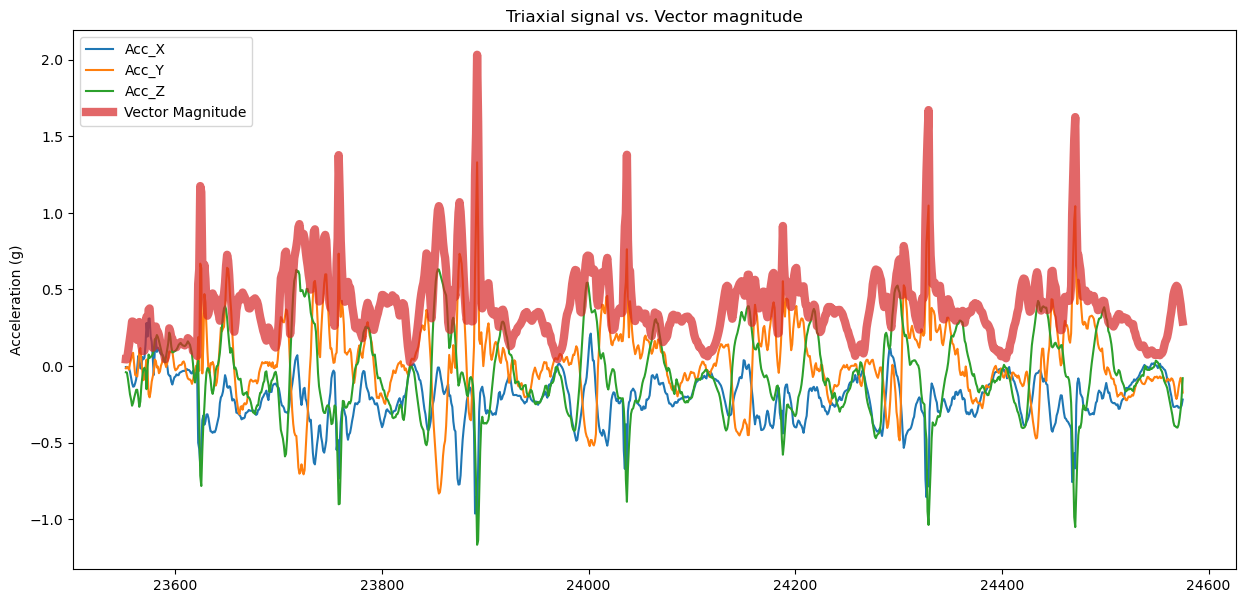

In [ ]:
# You can now visualise the vector magnitude compared to the triaxial signal:



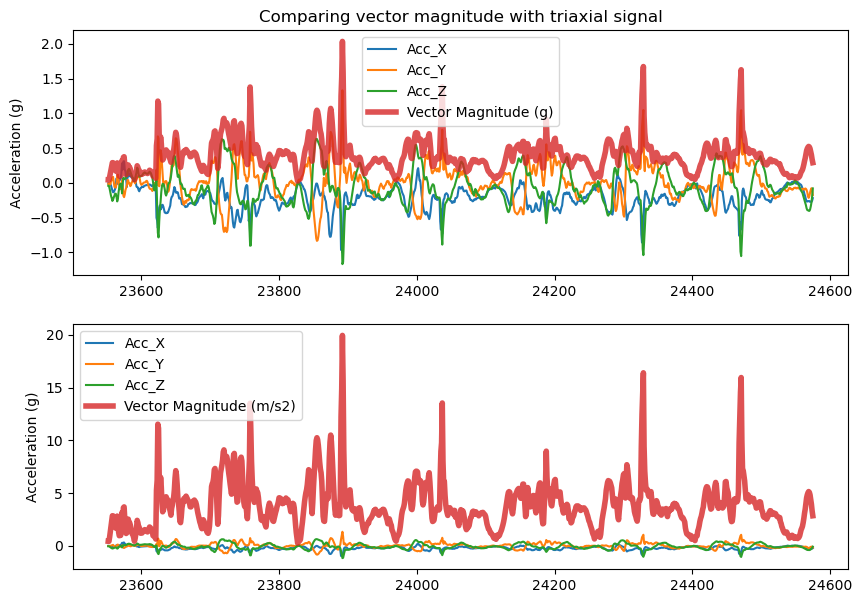

In [ ]:
# Task: observe the differences between the filtered and non-filtered data:



Now that we have calculated our features, we can look into analysing the features. 

To compare features we can do a simple correlation within this patient.

In [ ]:
# The first step is to make the structure into a matrix so that we could easily feed it into the corr function:

# Create correlation matrix for your statistical features
    # HINT: remeber to exclude the 'window_id', 'subject_id', 'wrist', and 'task' columns if you have them in your dataframe since they are not features.


    
    

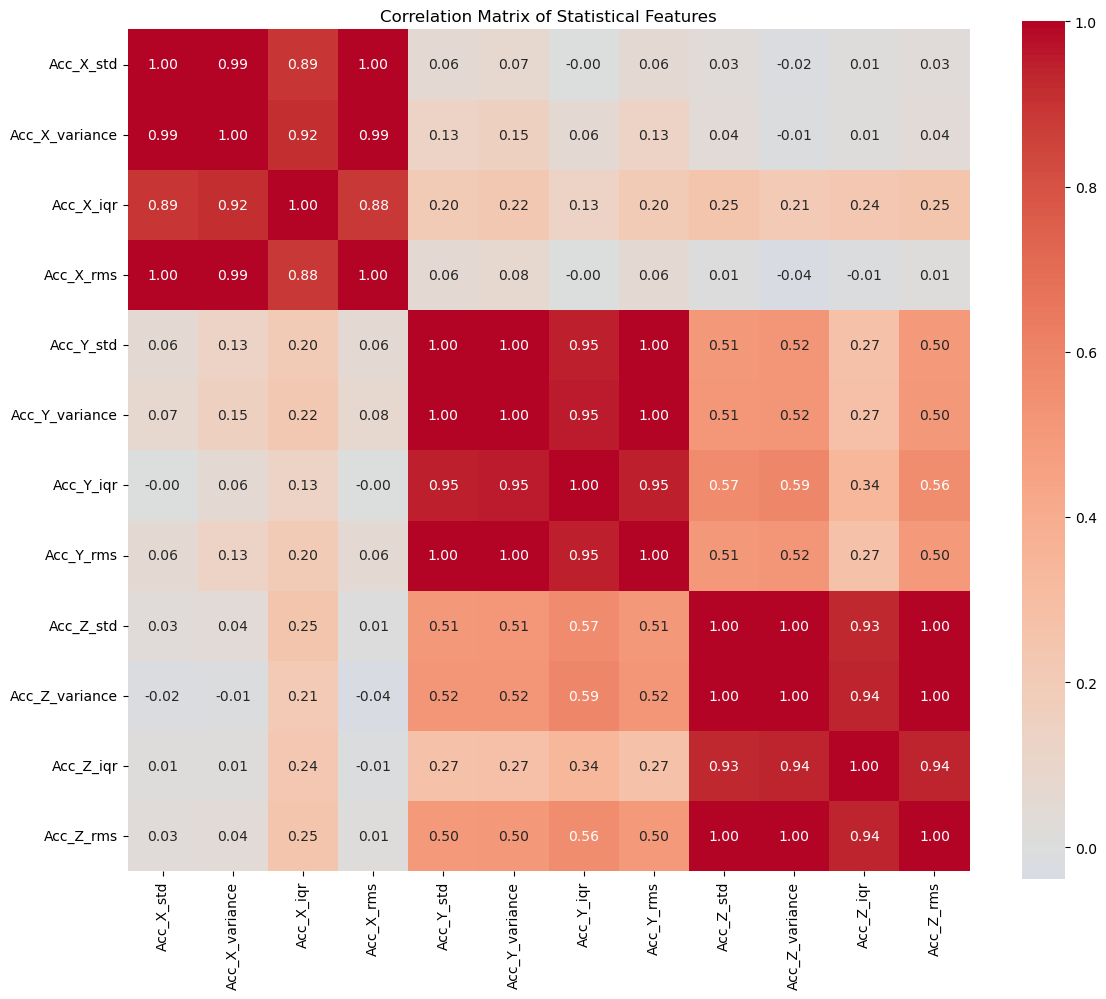

In [ ]:
# Now, plot the correlation matrix:
    # NOTE: in my example, I have only done this for the statistical features for simplicity. 
    # However, you have already calculated the features for all axes, subjects, wrists, and tasks, for both statsitical features and windowed frequency features.
    # Try doing this for all features.

import seaborn as sns 



### What do you observe?

- Why are several features highly correlated?
- Why are the Y and Z aces more correlated with each other than with the X axis? **HINT** Think of this task TouchNose. What does it imply in terms of movement? Around which axes do you move? Is it a circular movement? 